In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load all CSV files
path = r"C:\Users\shruti\Desktop\Data Analytics and AI\nifty 50 stocks - Copy"
all_files = glob.glob(path + "/*.csv")

dataframes = []
for file in all_files:
    df = pd.read_csv(file)
    stock_name = file.split('/')[-1].replace('.csv', '')  # Extract stock name from file name
    df['Stock'] = stock_name
    dataframes.append(df)

# Concatenate all stock data
all_stocks_data = pd.concat(dataframes, ignore_index=True)


In [3]:
#Export csv File
all_stocks_data.to_csv('combined_stock_data.csv', index=False)

In [4]:
#Reading the combined data file
df = pd.read_csv('combined_stock_data_2.csv')
df.head()

Price  Adj Close     Close      High       Low  \
0  2002-07-01 00:00:00+00:00  -0.010443  1.362615  1.401700  1.334259   
1  2002-07-02 00:00:00+00:00  -0.010525  1.373344  1.390971  1.356484   
2  2002-07-03 00:00:00+00:00  -0.010525  1.373344  1.387139  1.364914   
3  2002-07-04 00:00:00+00:00  -0.010584  1.381008  1.401700  1.379475   
4  2002-07-05 00:00:00+00:00  -0.010560  1.377942  1.388672  1.372578   

       Open   Volume      Stock  
0  1.364148  1080397   ADANIENT  
1  1.386372  1016147   ADANIENT  
2  1.371811   980394   ADANIENT  
3  1.379475   972747   ADANIENT  
4  1.388672   974496   ADANIENT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295627 entries, 0 to 295626
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Price      295627 non-null  object 
 1   Adj Close  295627 non-null  float64
 2   Close      295627 non-null  float64
 3   High       295627 non-null  float64
 4   Low        295627 non-null  float64
 5   Open       295627 non-null  float64
 6   Volume     295627 non-null  int64  
 7   Stock      295627 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 18.0+ MB


In [6]:
#Renaming Column
df.rename(columns={'Price': 'Date'}, inplace=True)

In [7]:
#Changing datatype
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Daily Return'] = df.groupby('Stock')['Close'].pct_change()

In [9]:
inf_rows = df[np.isinf(df['Daily Return'])]
print("Rows with infinity values:")
print(inf_rows)

Rows with infinity values:
Empty DataFrame
Columns: [Date, Adj Close, Close, High, Low, Open, Volume, Stock, Daily Return]
Index: []


In [10]:
# Replace positive and negative infinity values with NaN
df['Daily Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [11]:
df['Daily Return'].fillna(0, inplace=True)

In [12]:
df.to_csv('cleaned_stock_data_3.csv', index=False)

In [13]:
df.head()

Date  Adj Close     Close      High       Low  \
0 2002-07-01 00:00:00+00:00  -0.010443  1.362615  1.401700  1.334259   
1 2002-07-02 00:00:00+00:00  -0.010525  1.373344  1.390971  1.356484   
2 2002-07-03 00:00:00+00:00  -0.010525  1.373344  1.387139  1.364914   
3 2002-07-04 00:00:00+00:00  -0.010584  1.381008  1.401700  1.379475   
4 2002-07-05 00:00:00+00:00  -0.010560  1.377942  1.388672  1.372578   

       Open   Volume      Stock  Daily Return  
0  1.364148  1080397   ADANIENT      0.000000  
1  1.386372  1016147   ADANIENT      0.007874  
2  1.371811   980394   ADANIENT      0.000000  
3  1.379475   972747   ADANIENT      0.005581  
4  1.388672   974496   ADANIENT     -0.002220

## Visualizations

1. **Stock price over time:** A line chart depicting the change in stock price over years. X-axis has the date with Y-axis having the share close price.

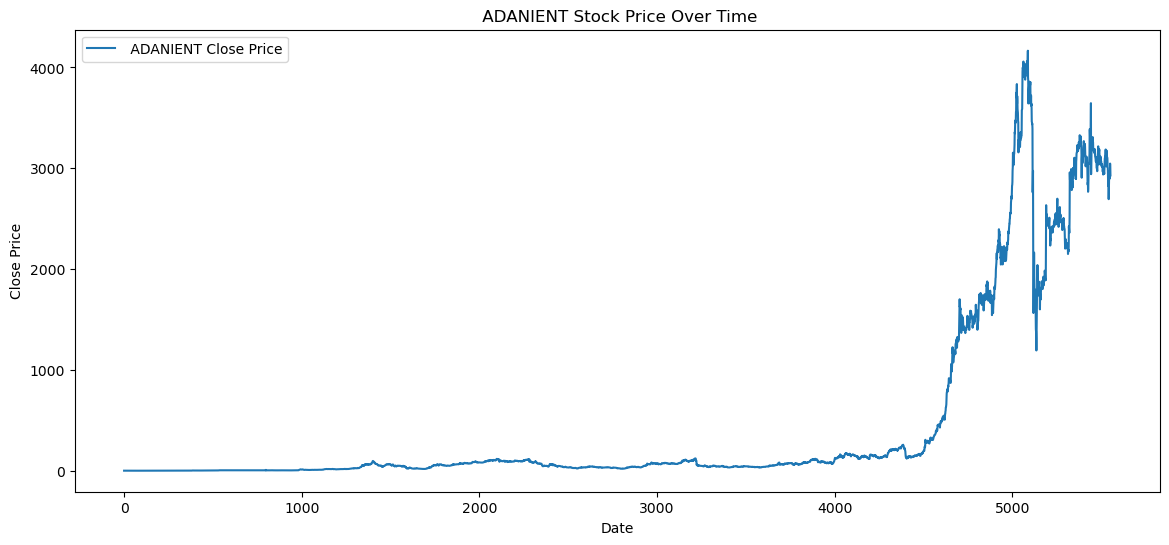

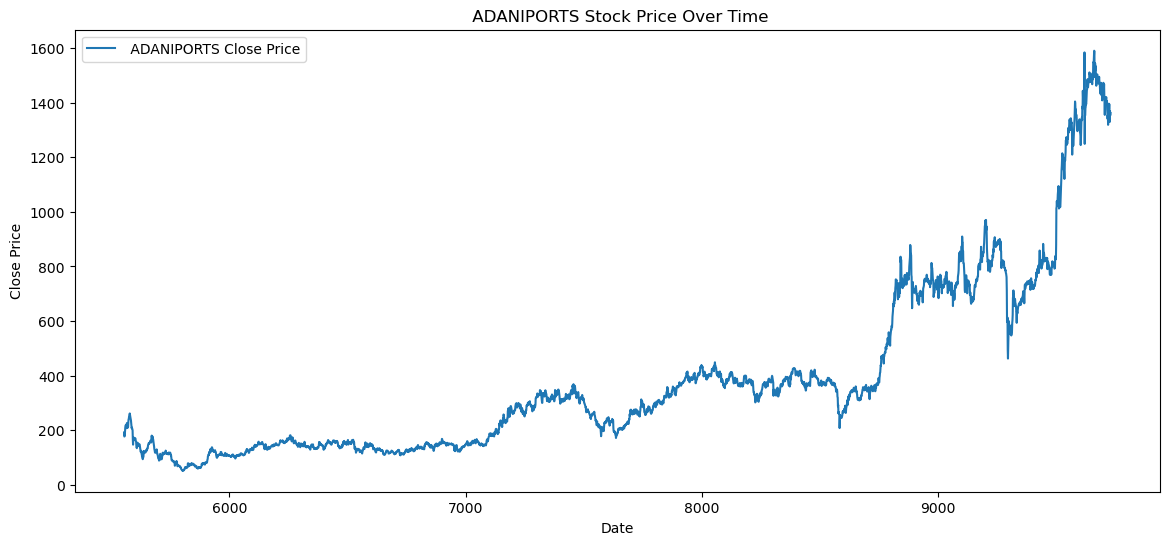

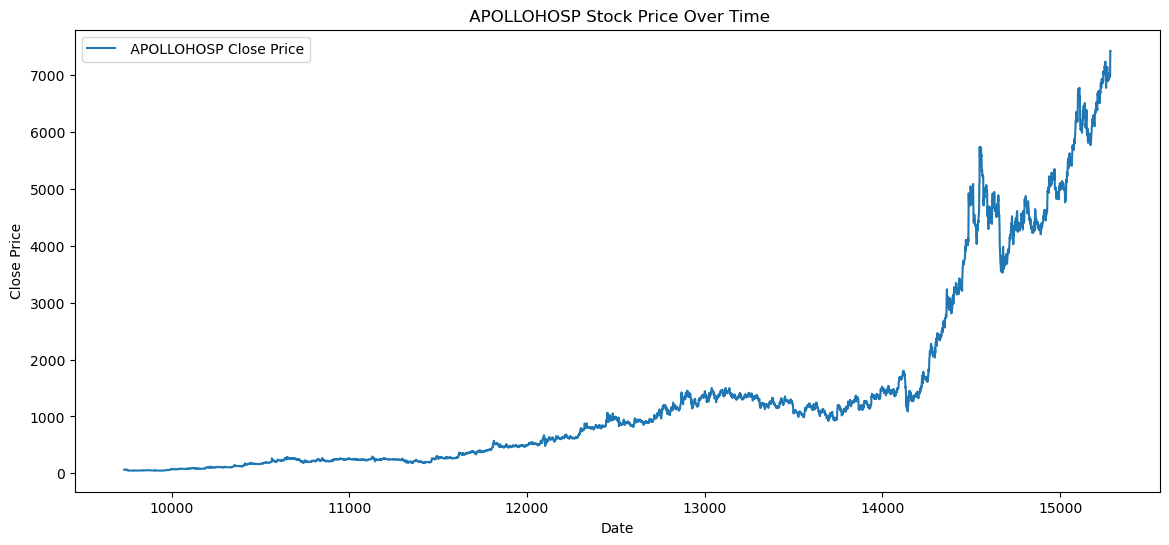

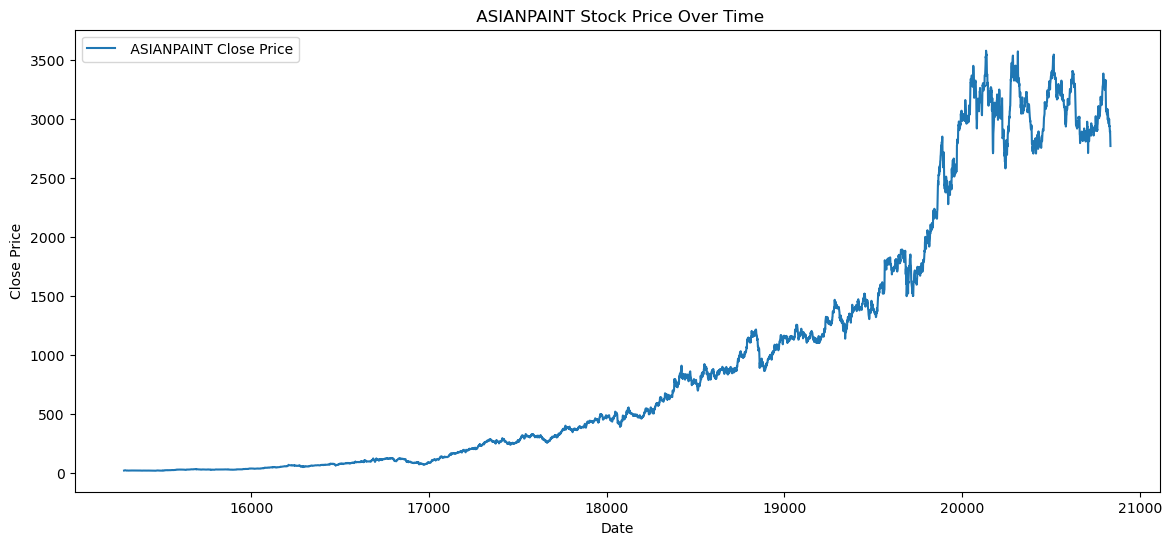

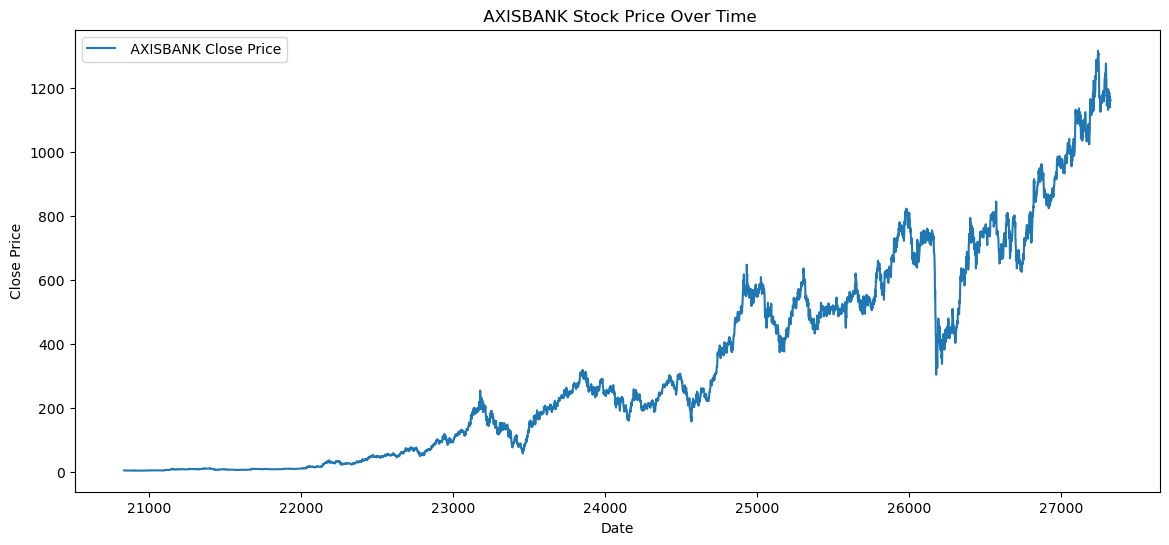

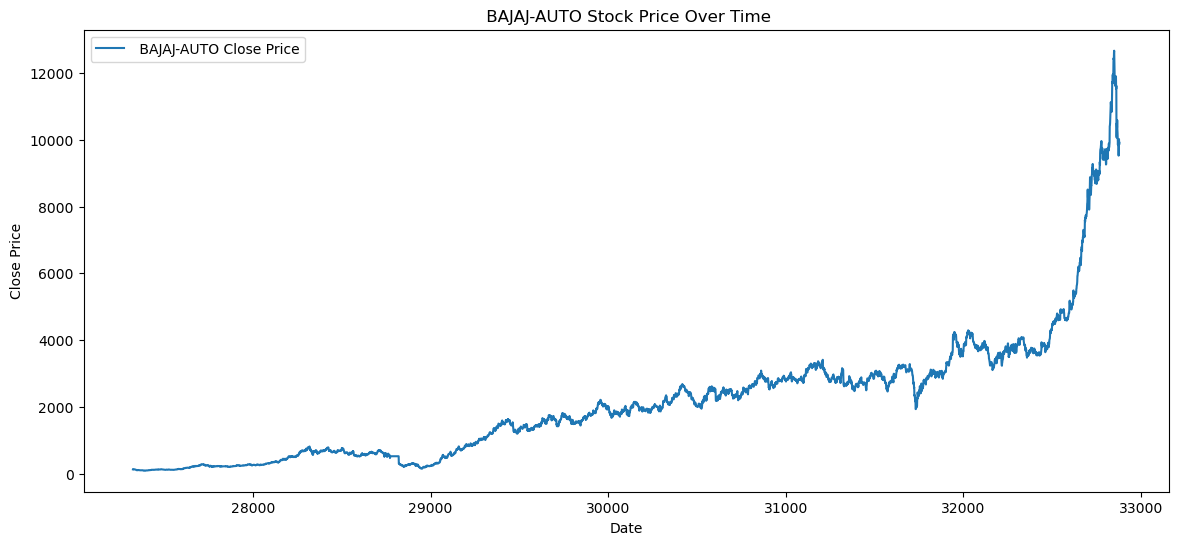

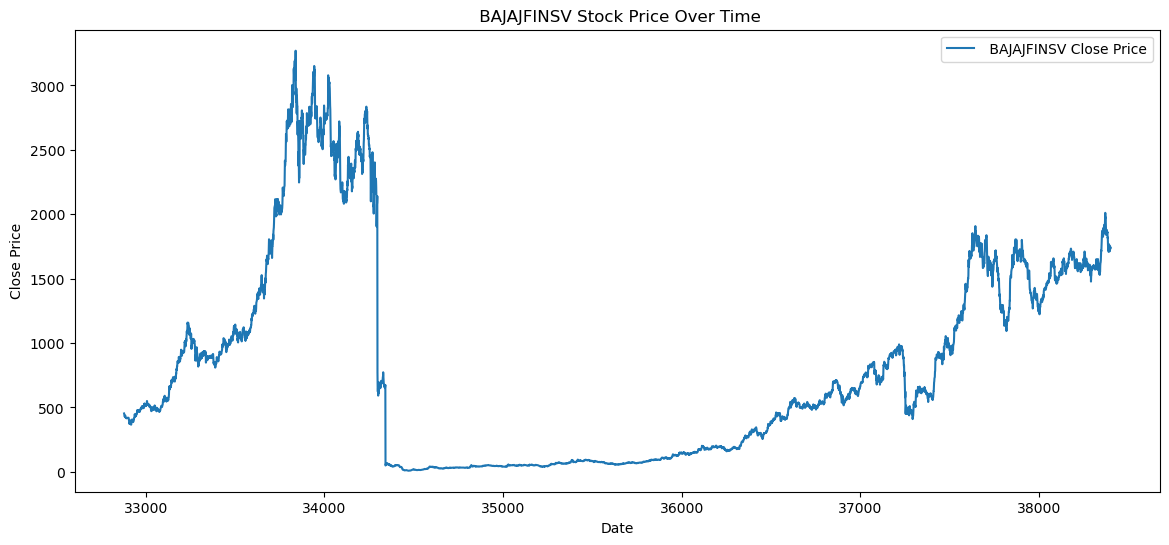

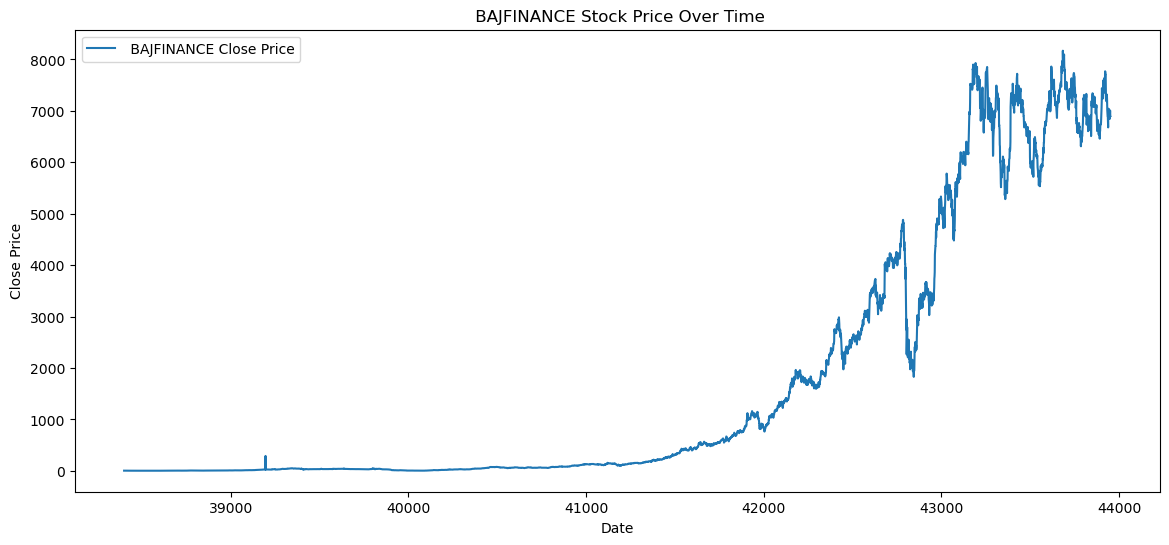

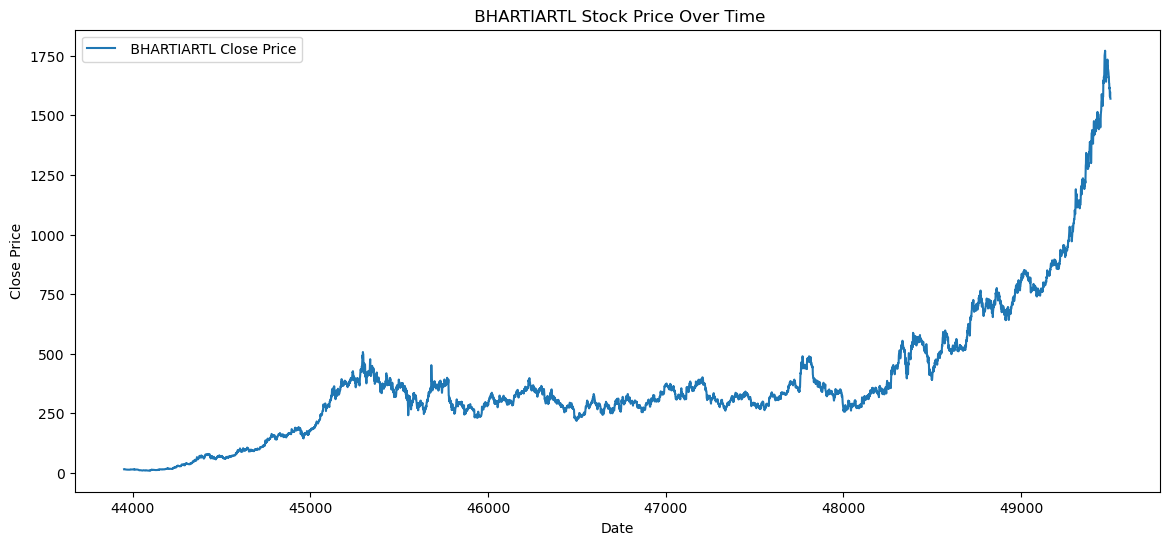

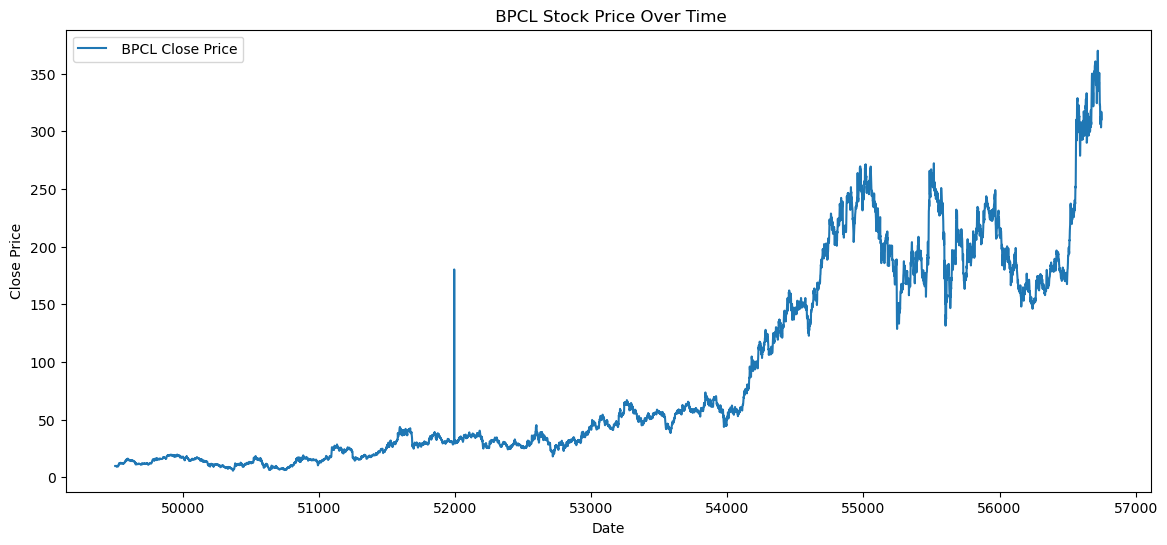

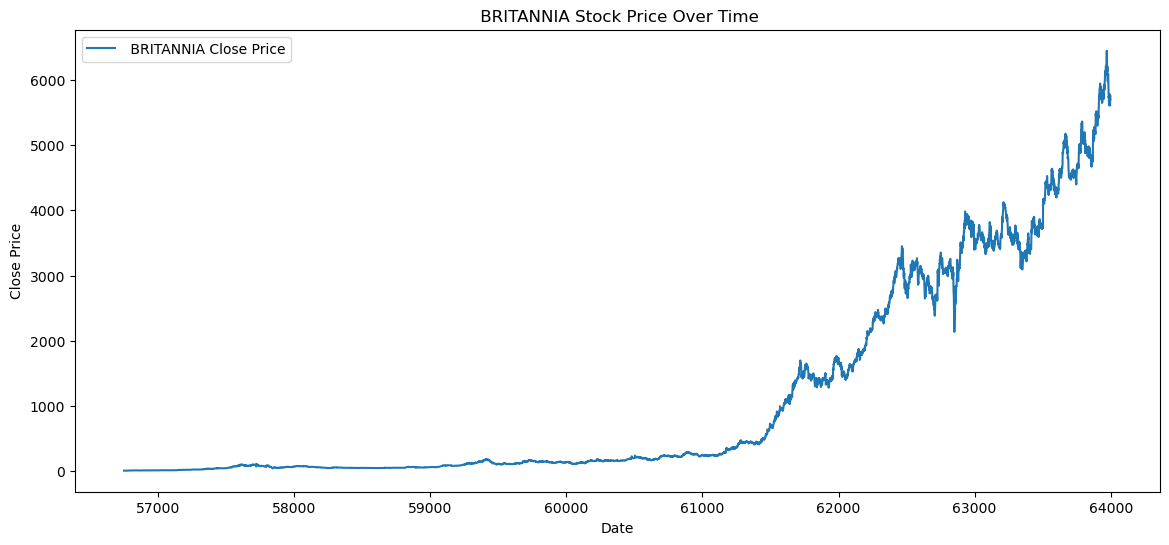

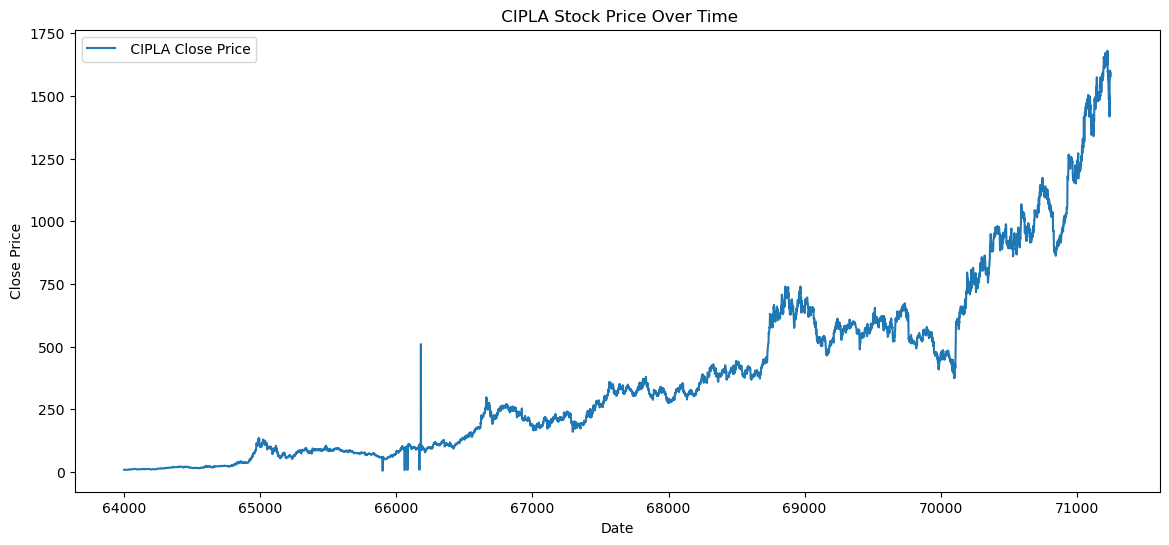

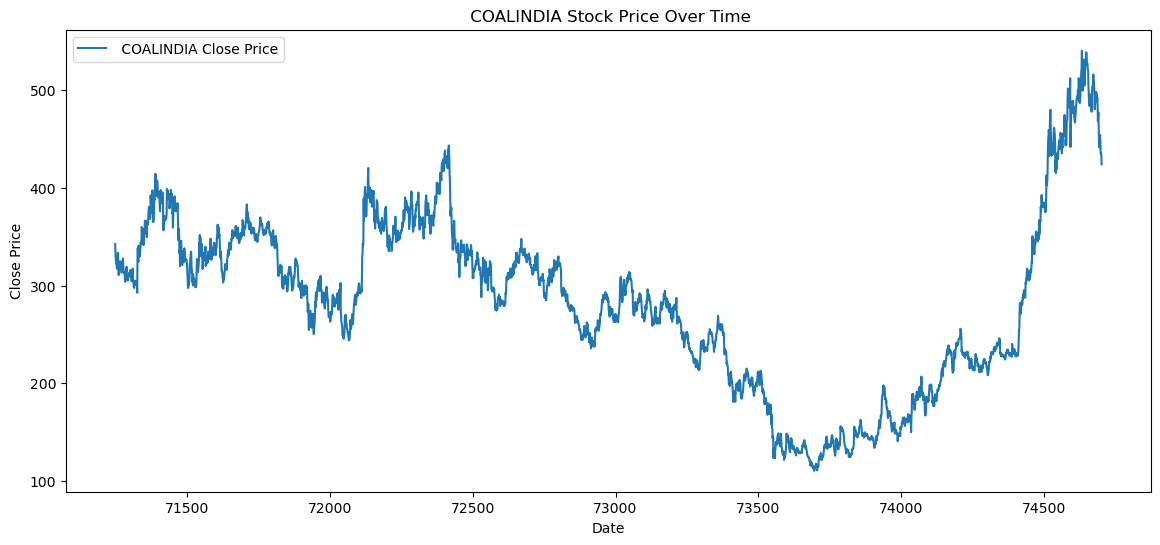

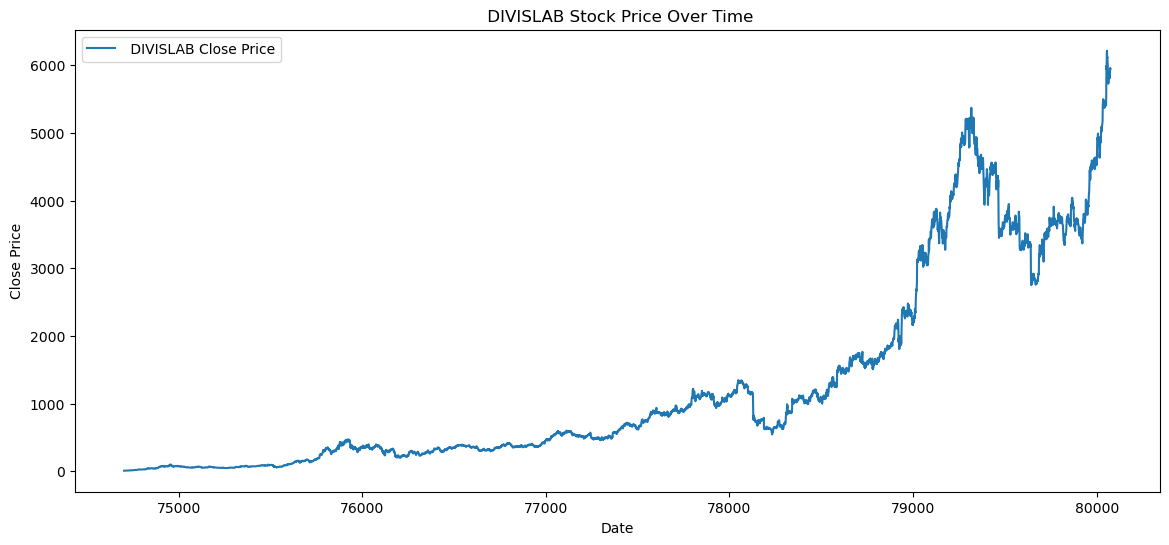

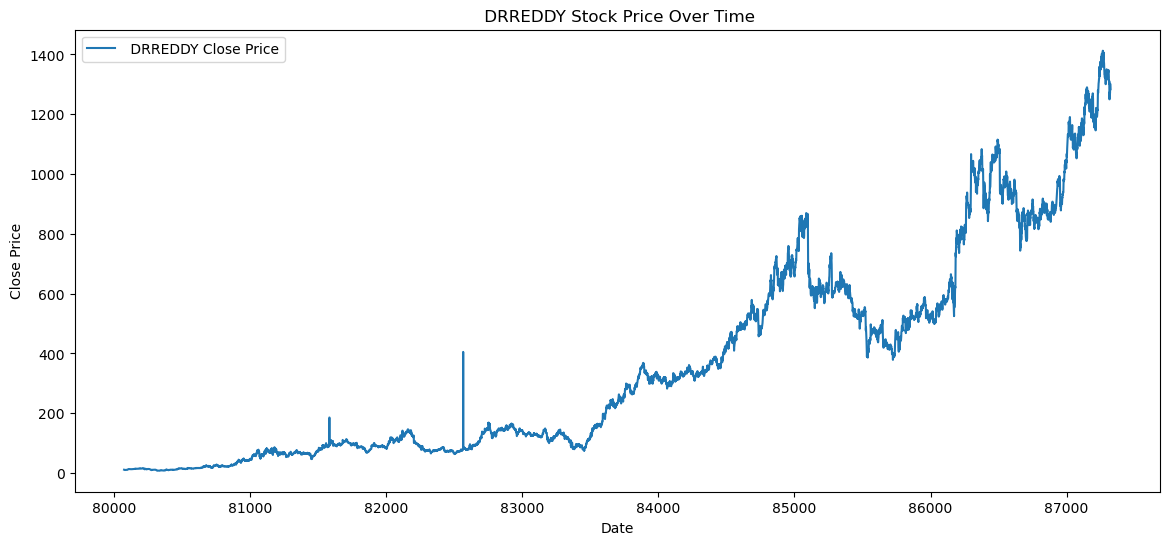

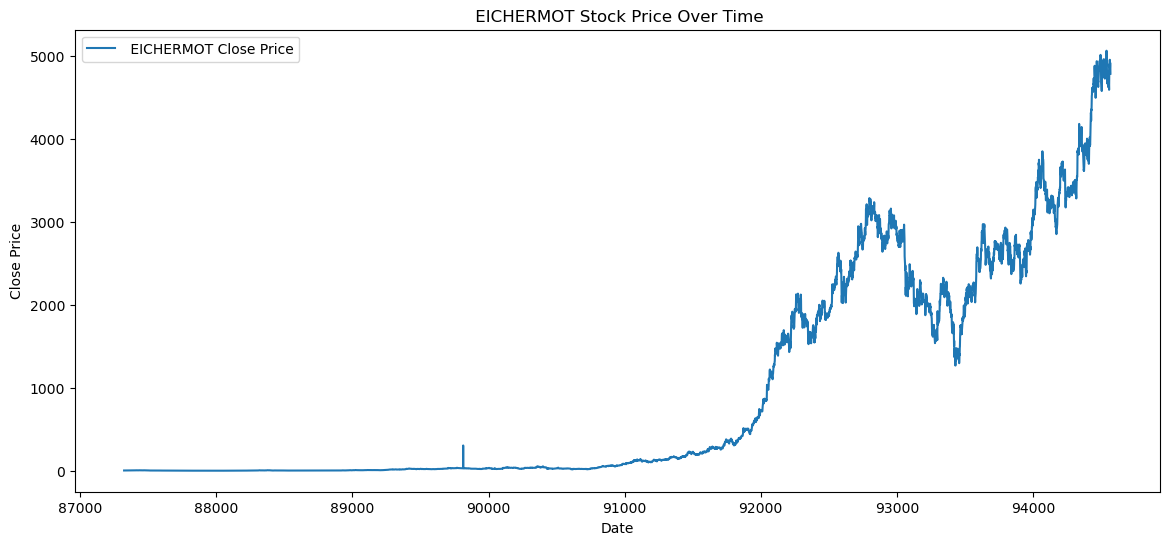

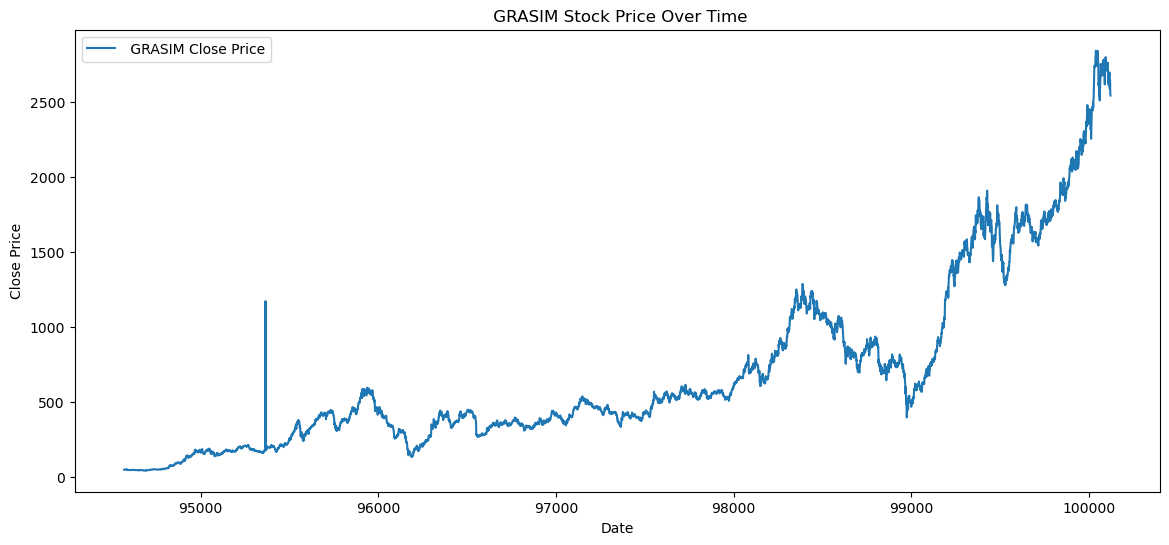

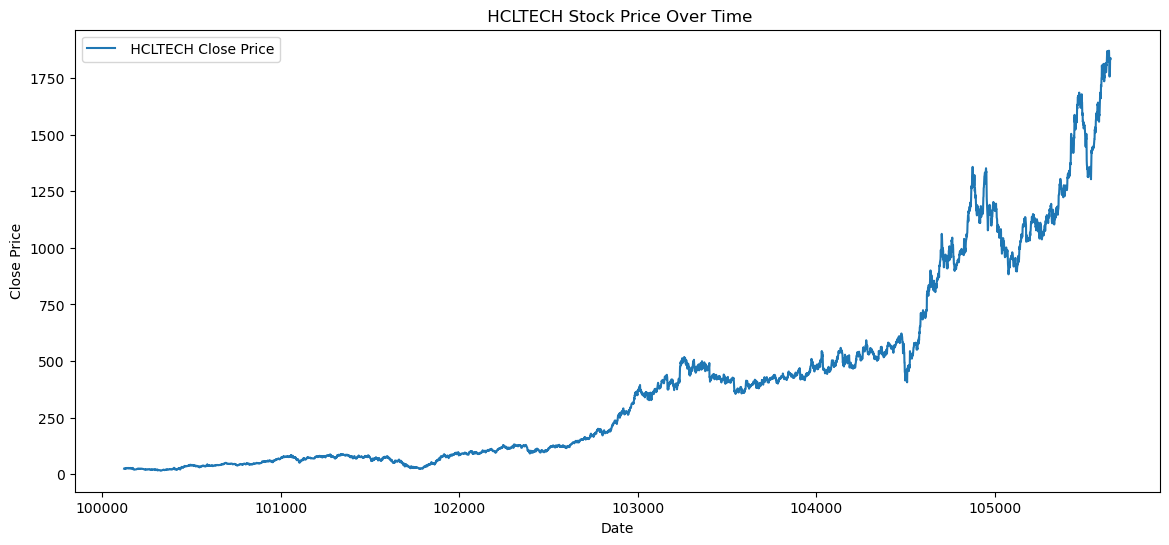

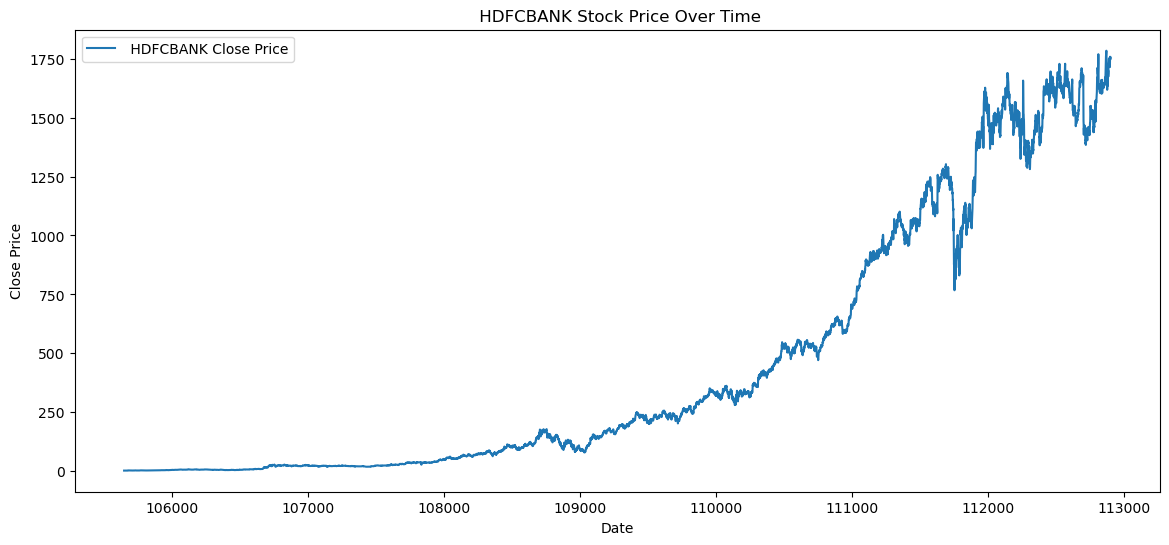

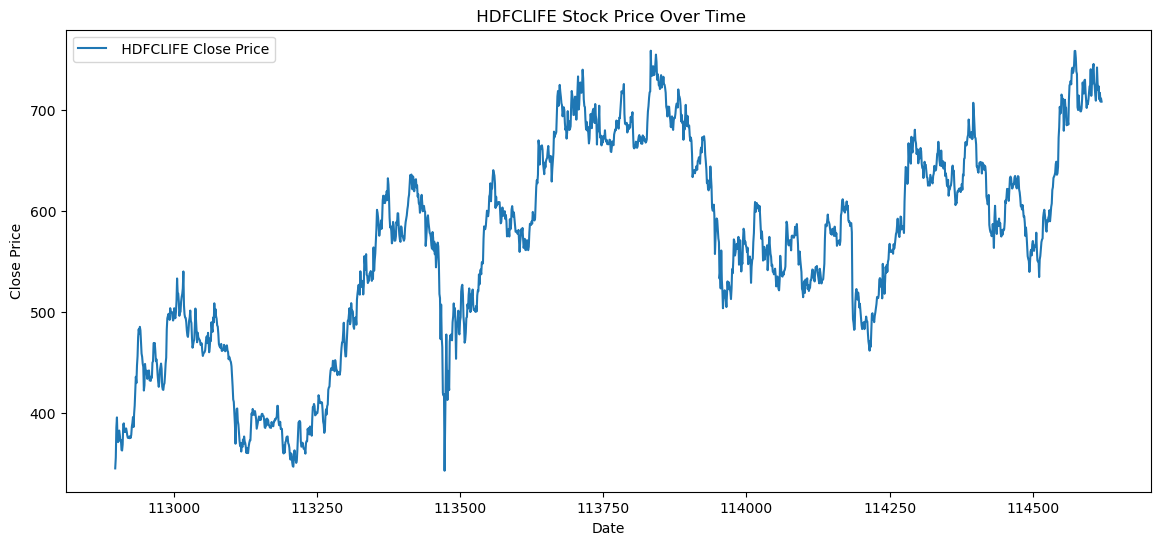

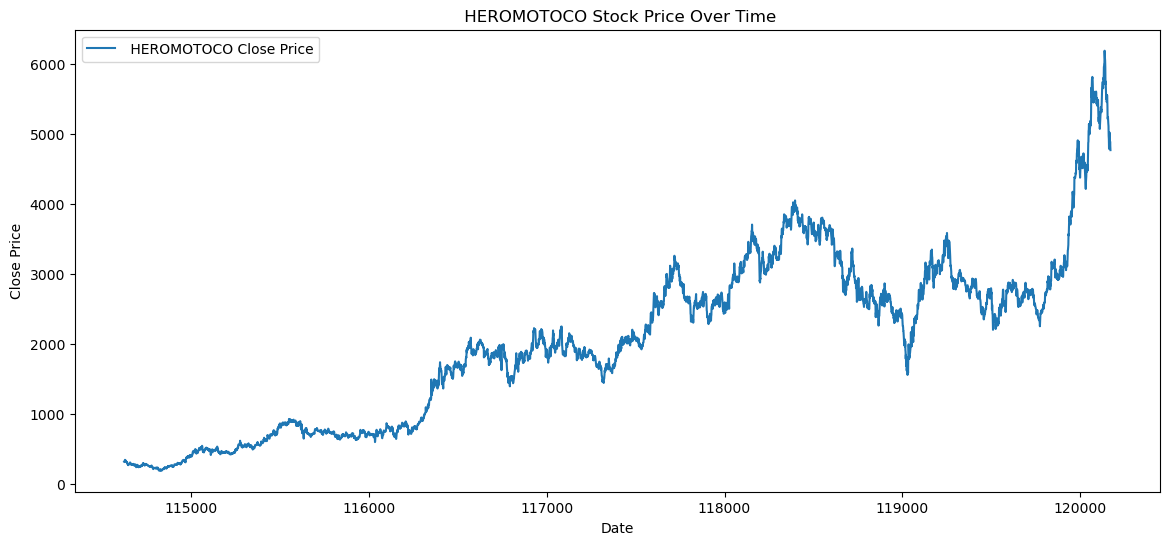

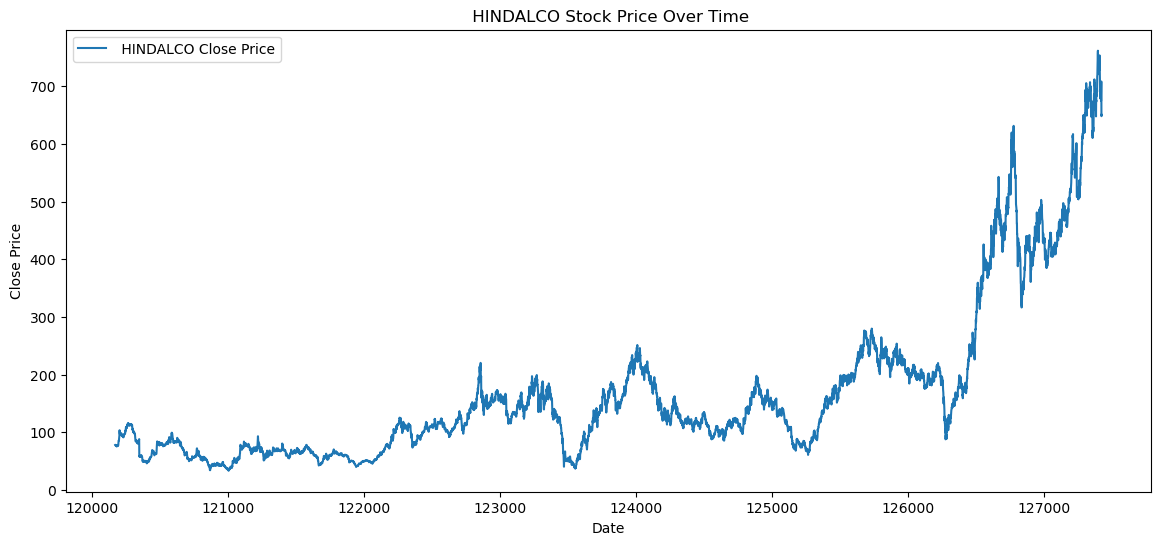

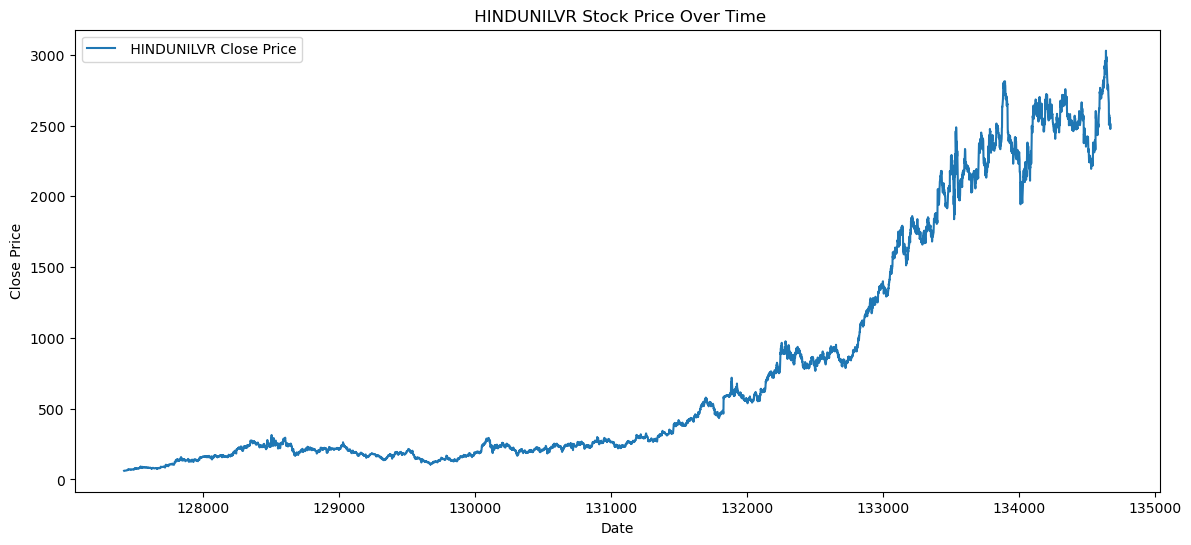

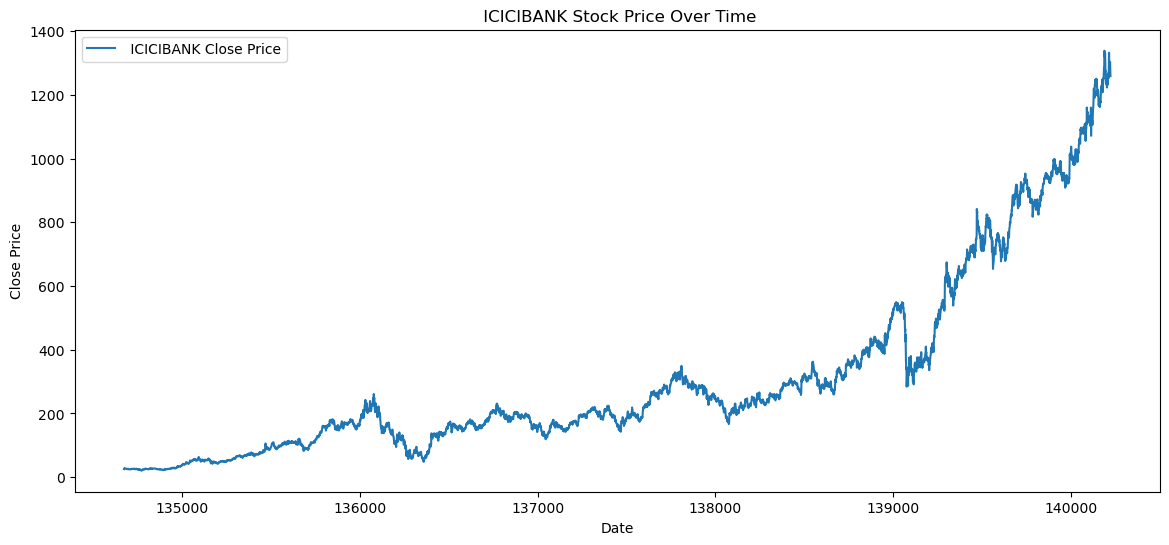

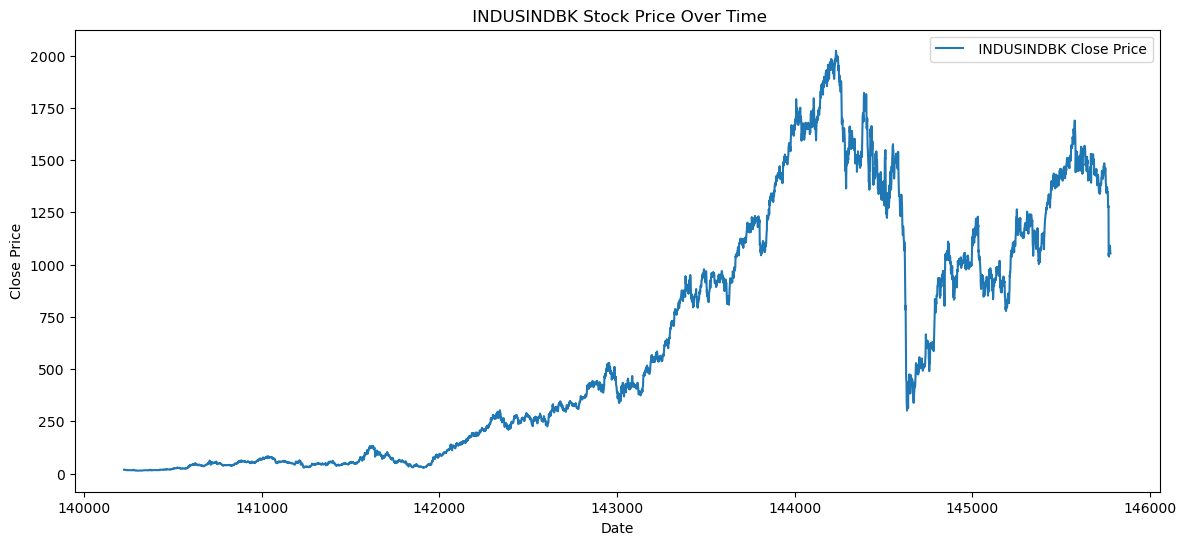

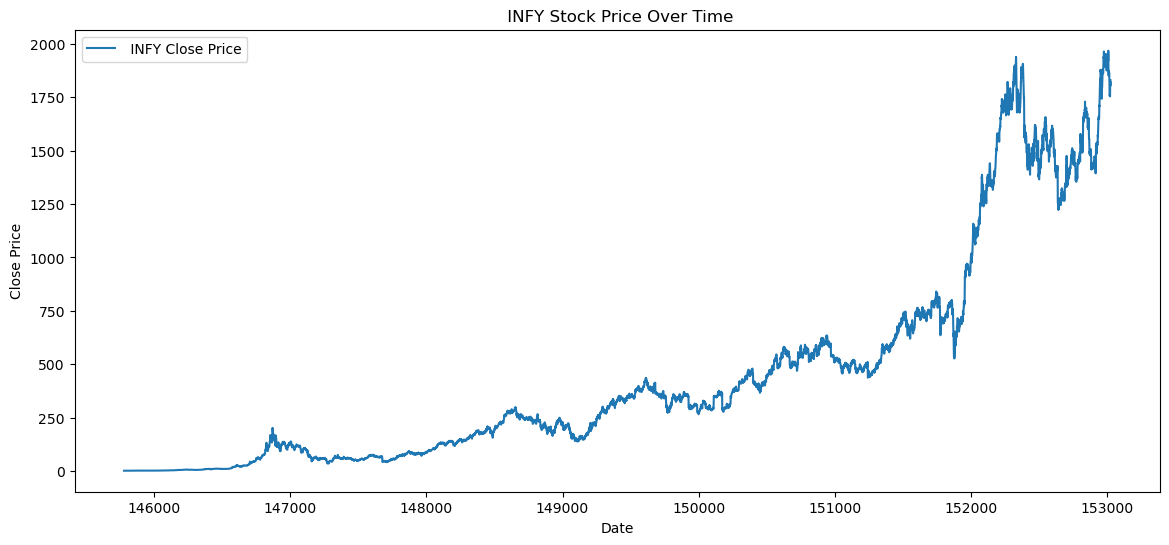

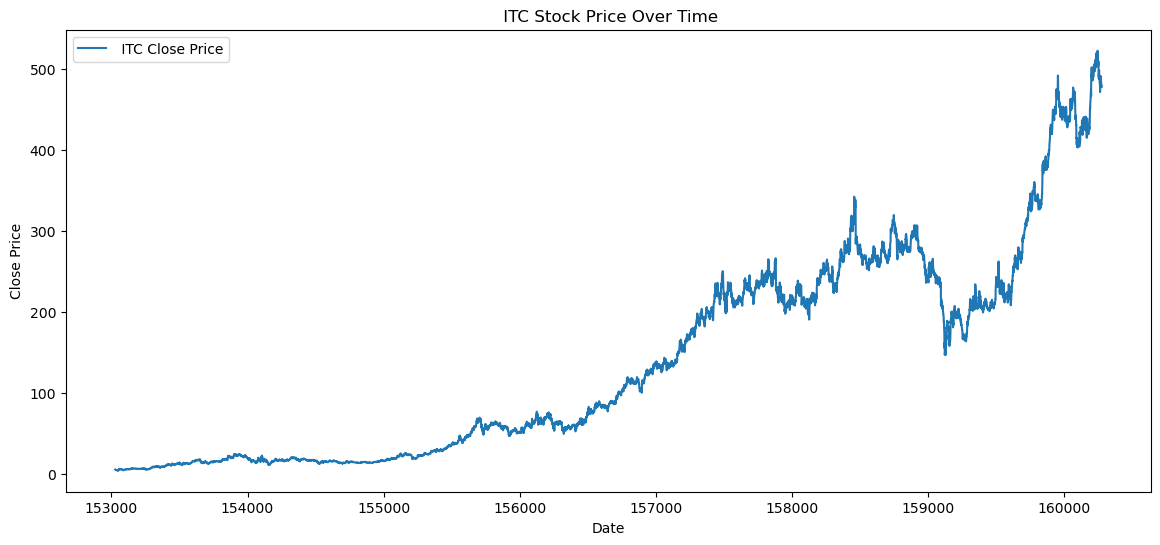

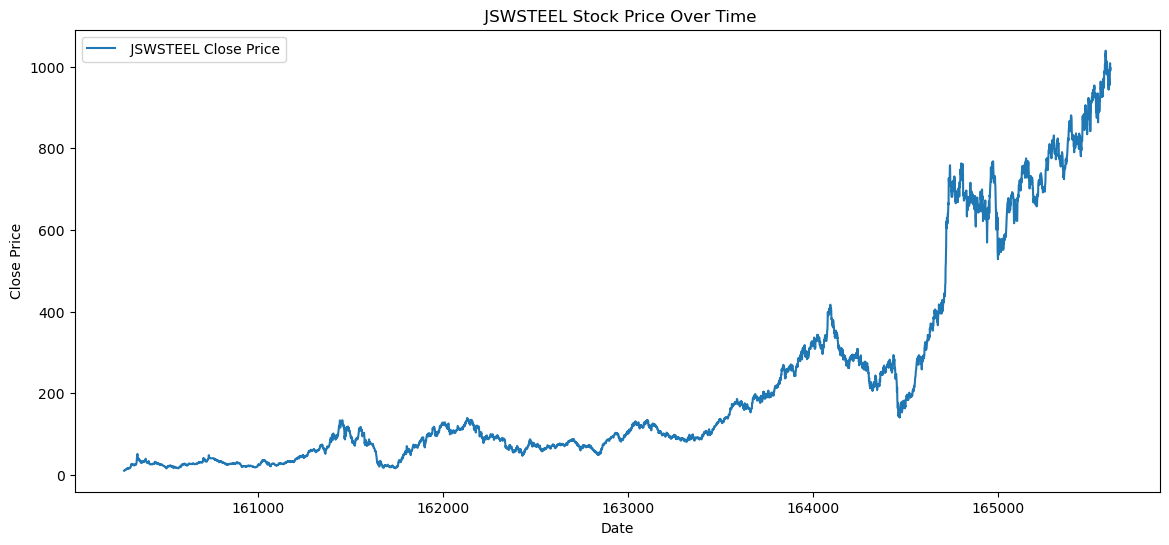

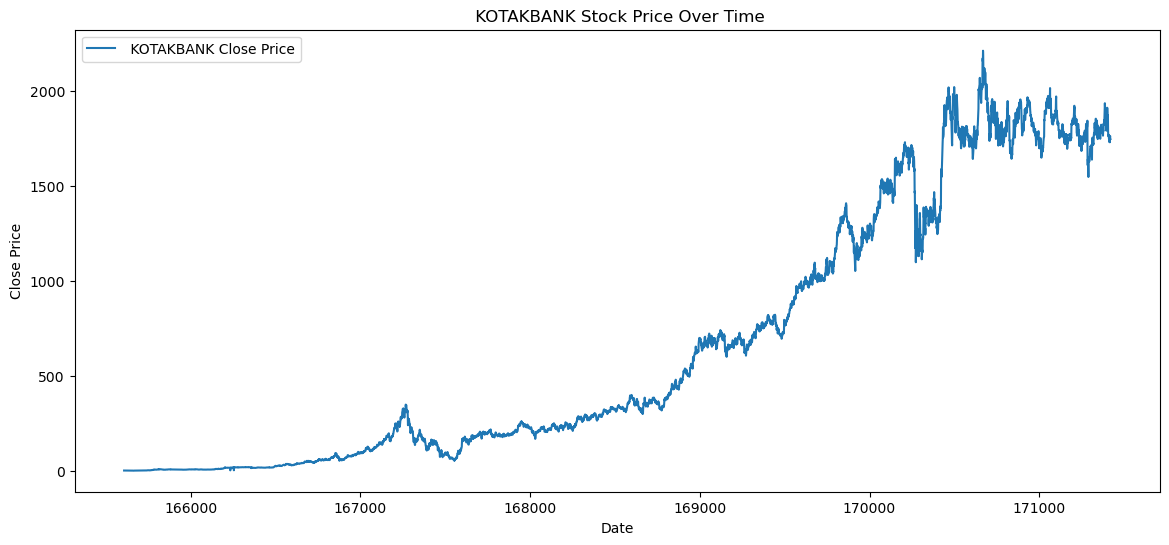

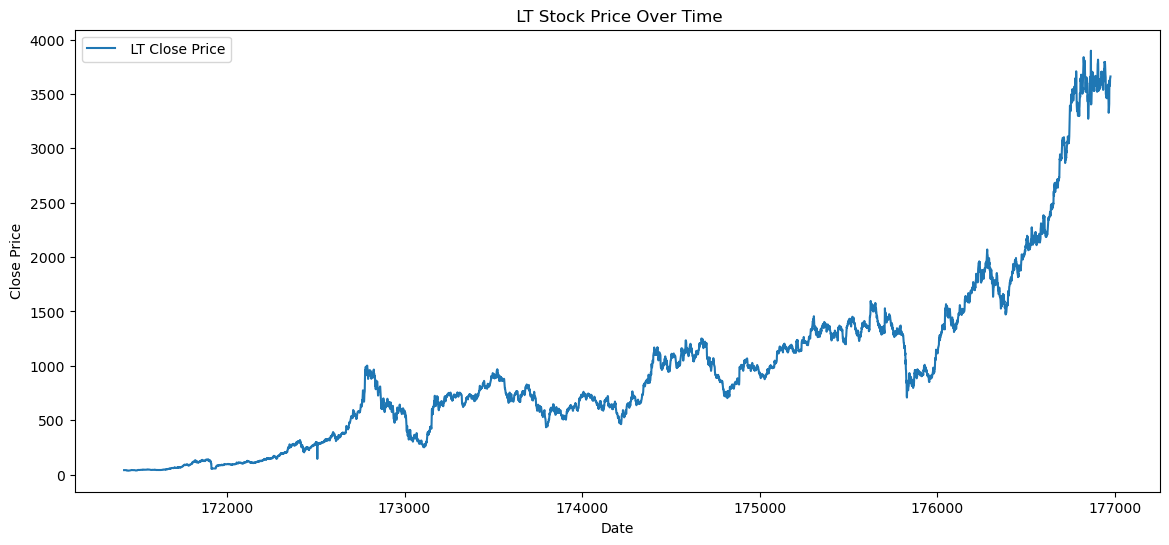

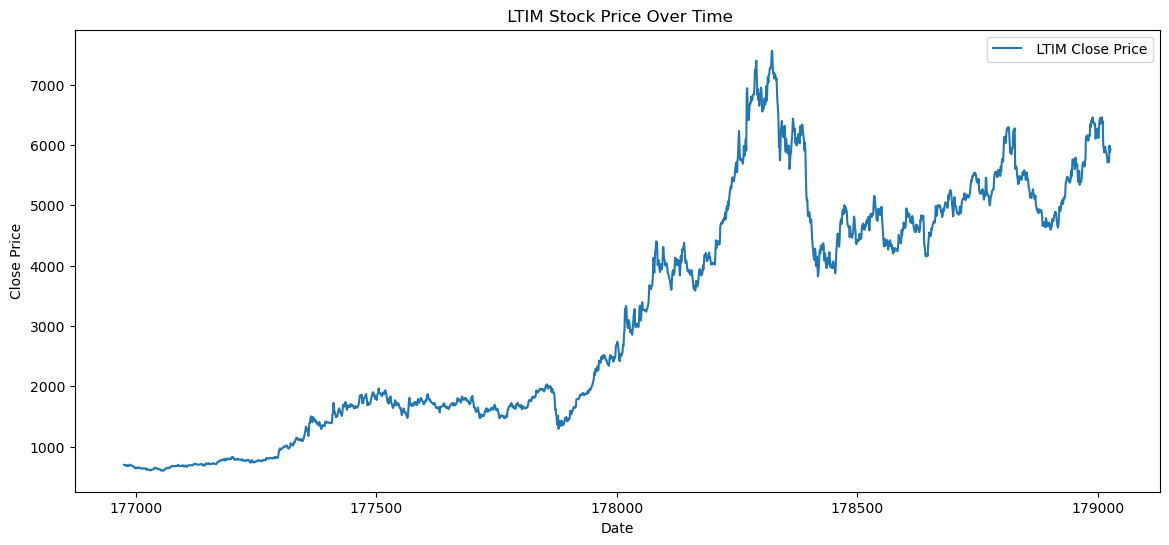

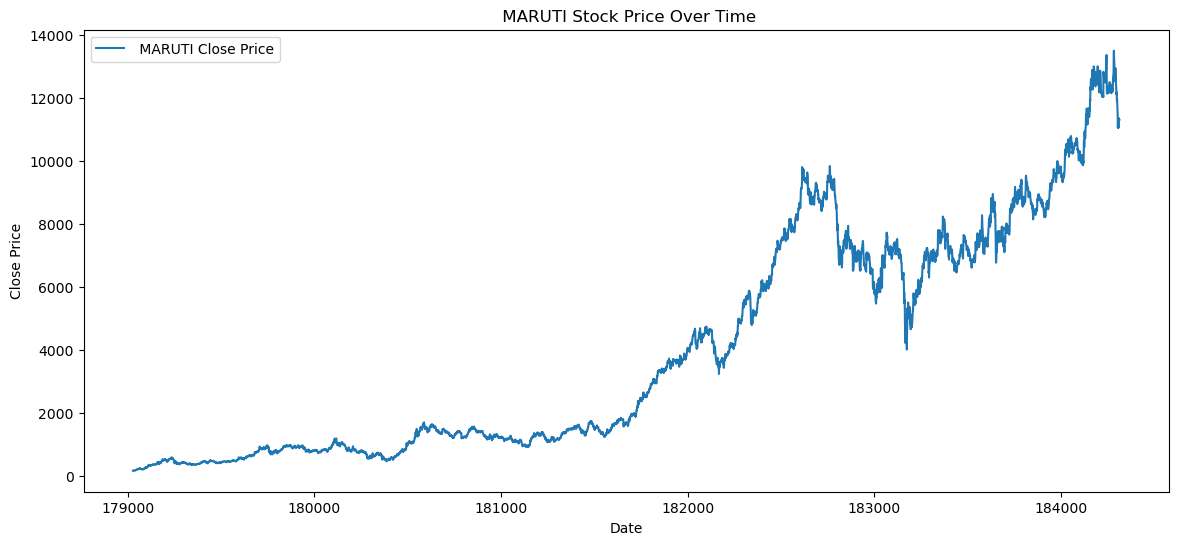

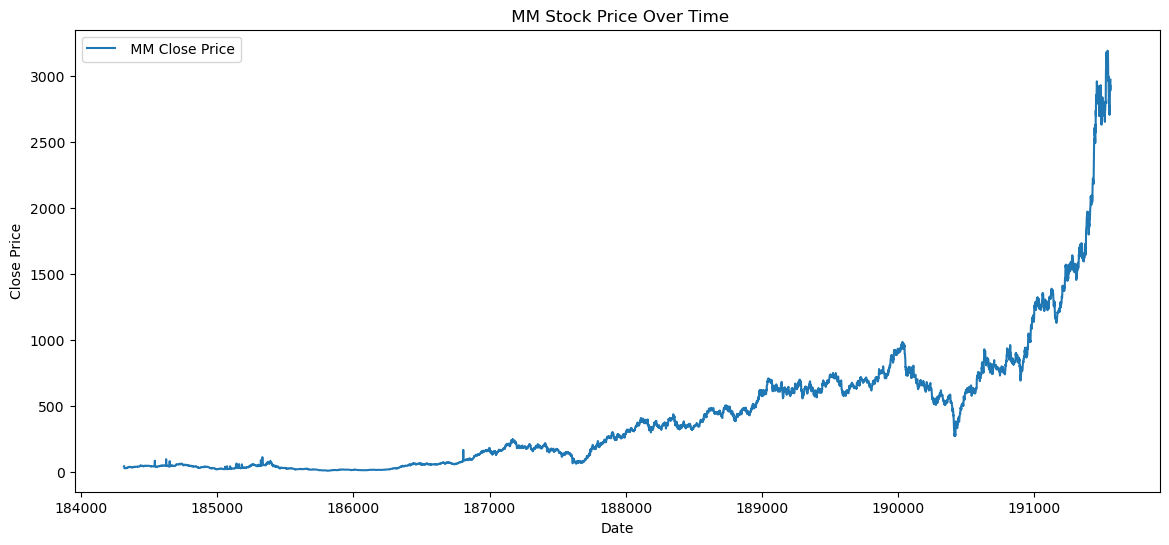

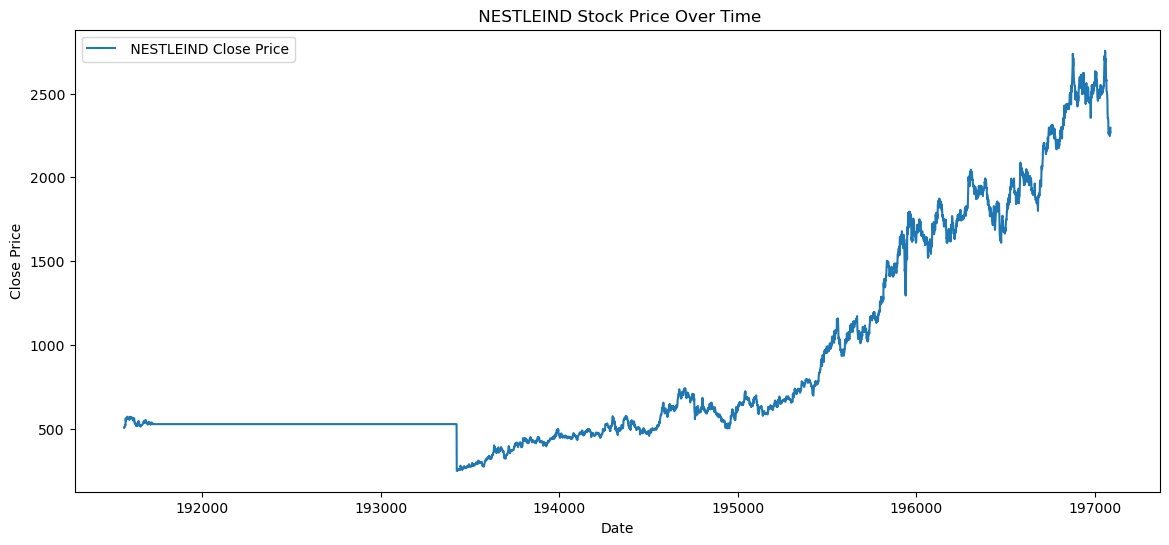

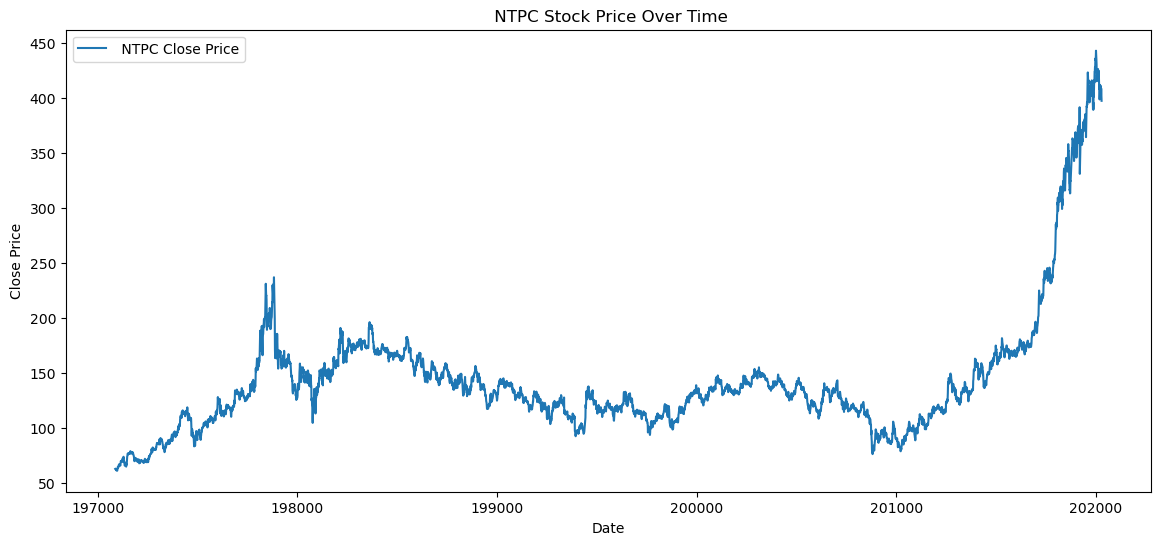

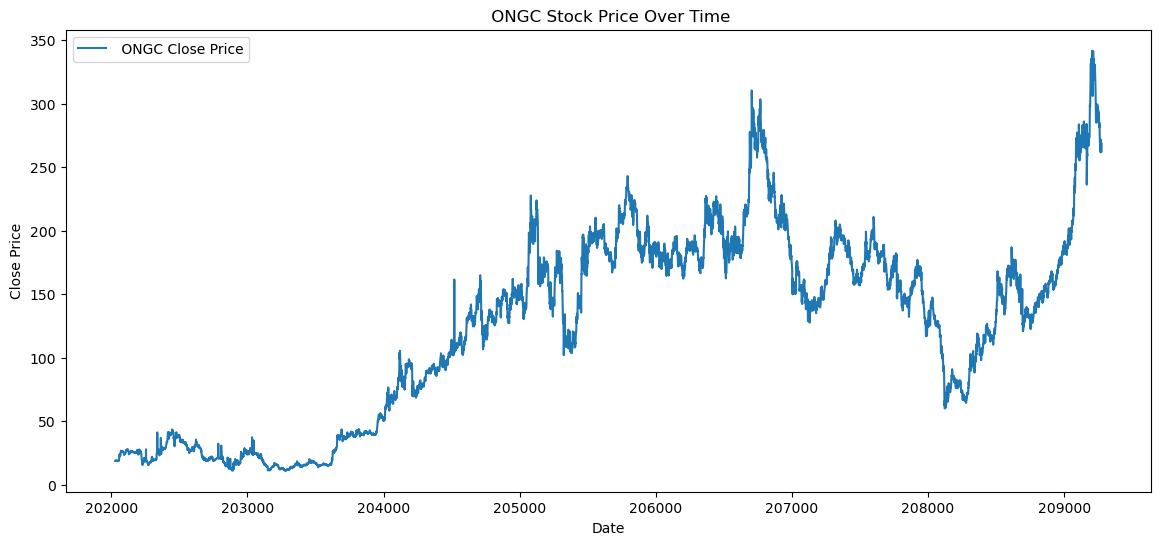

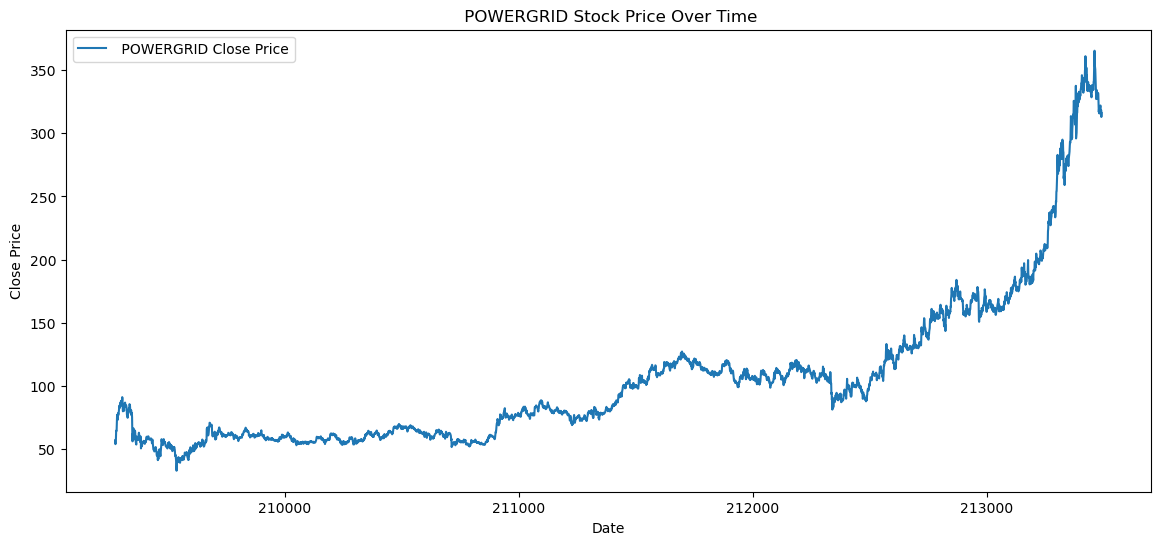

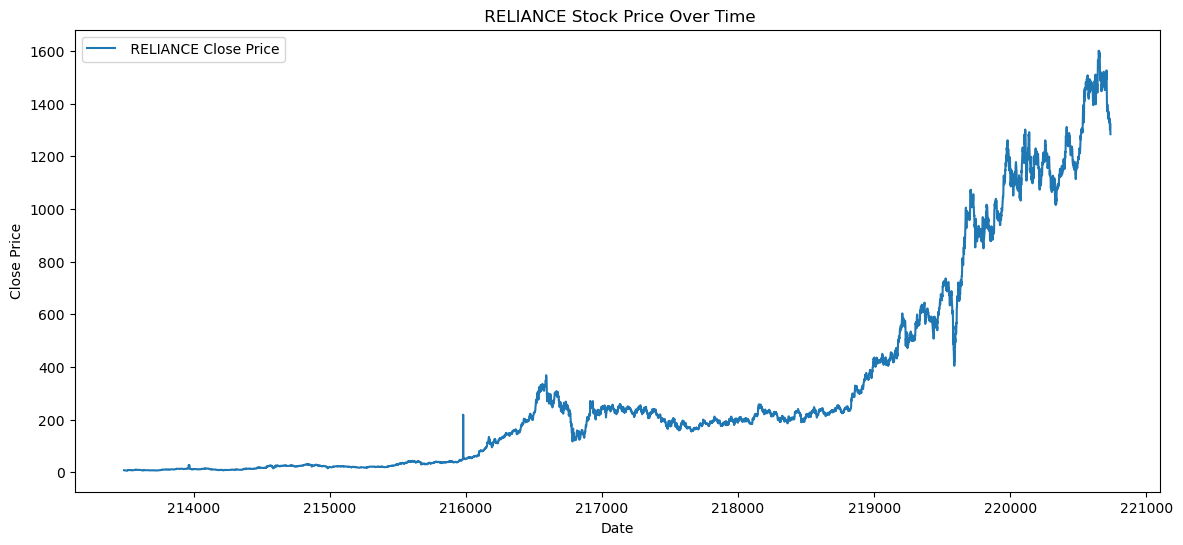

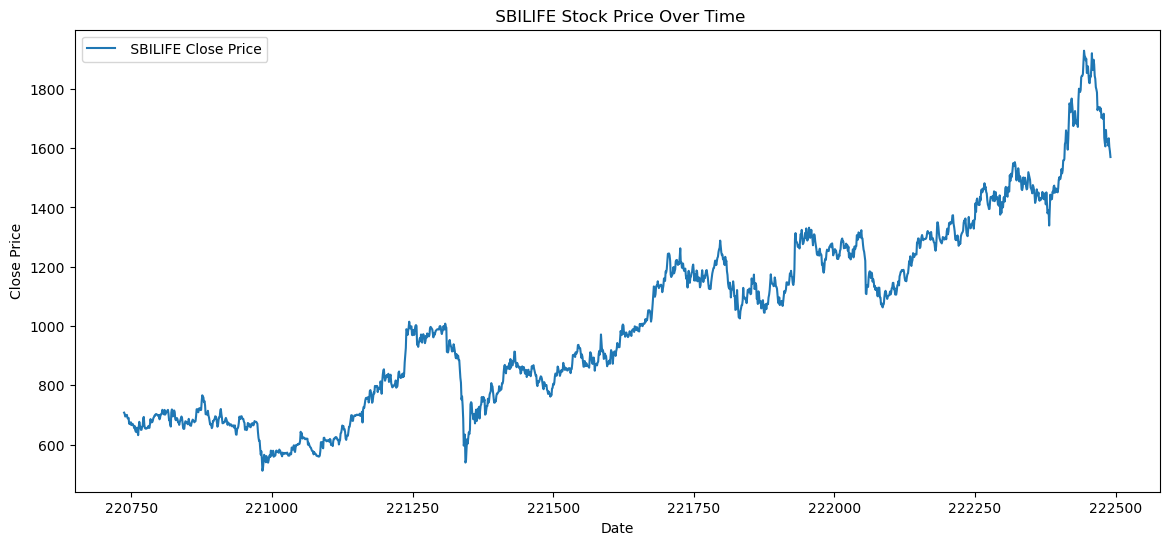

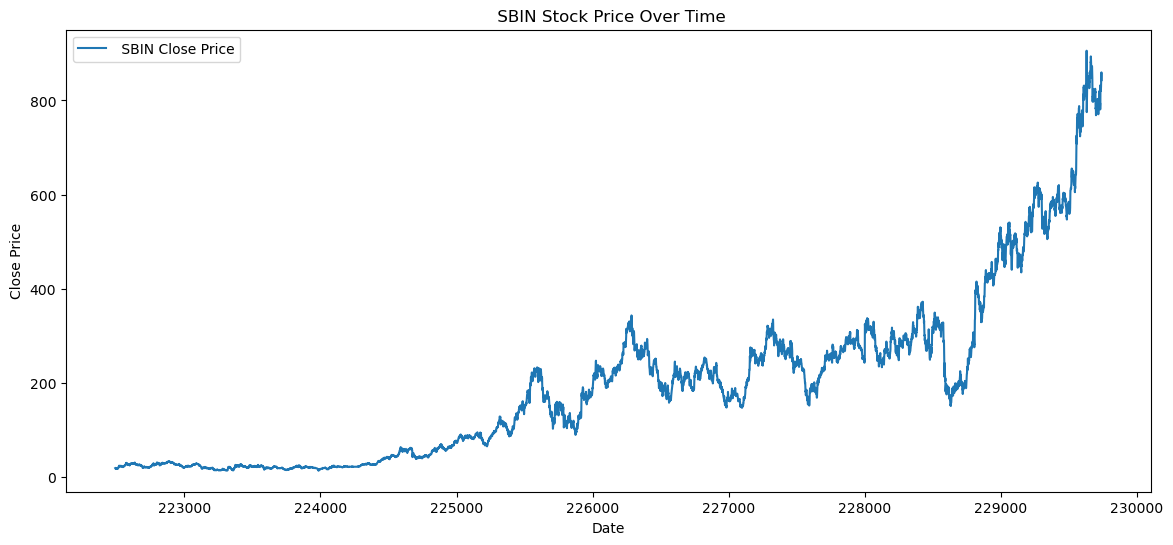

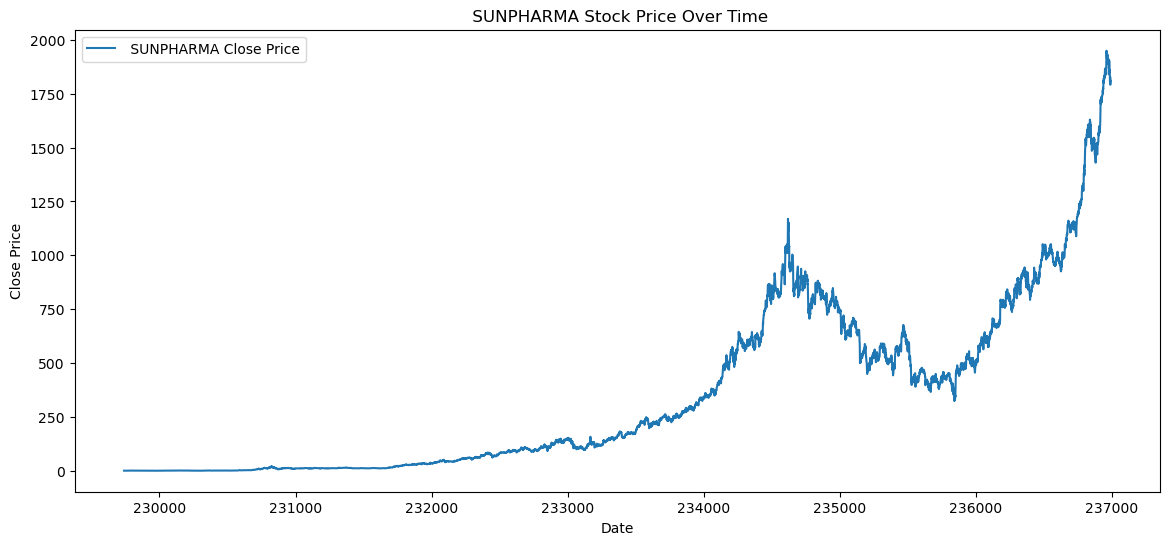

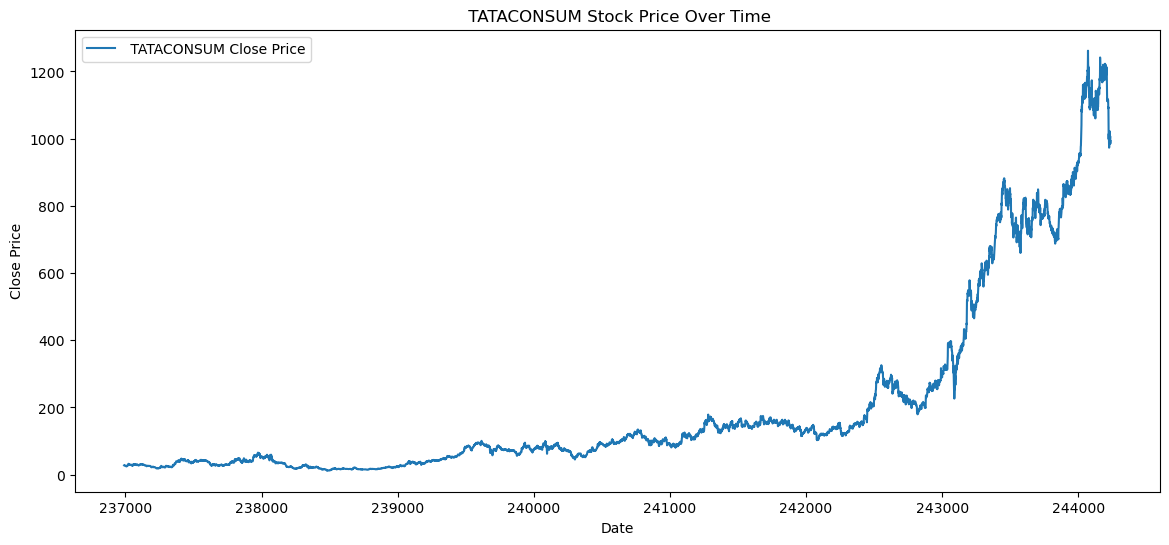

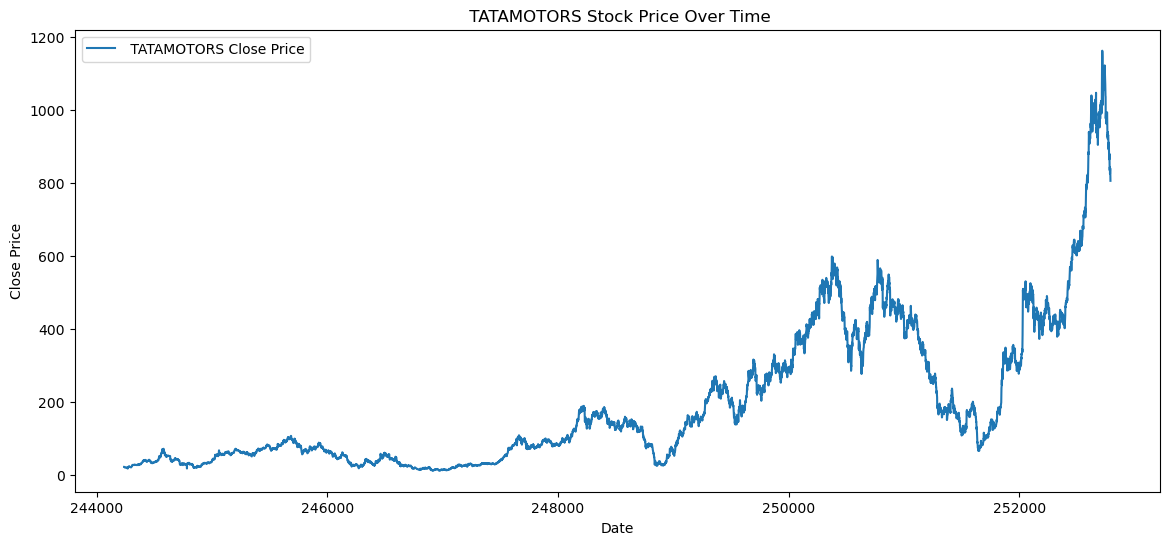

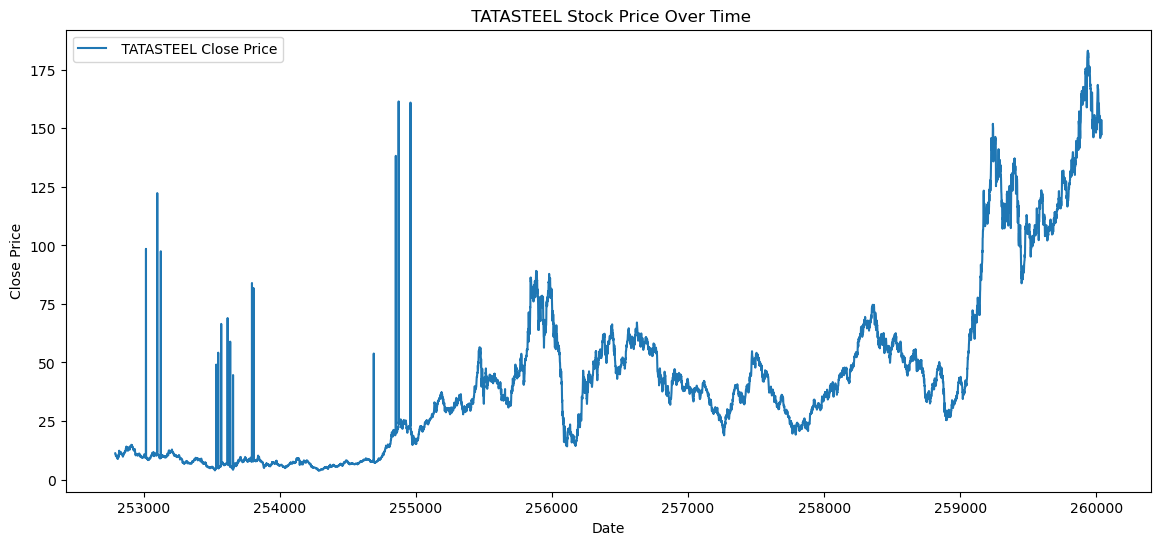

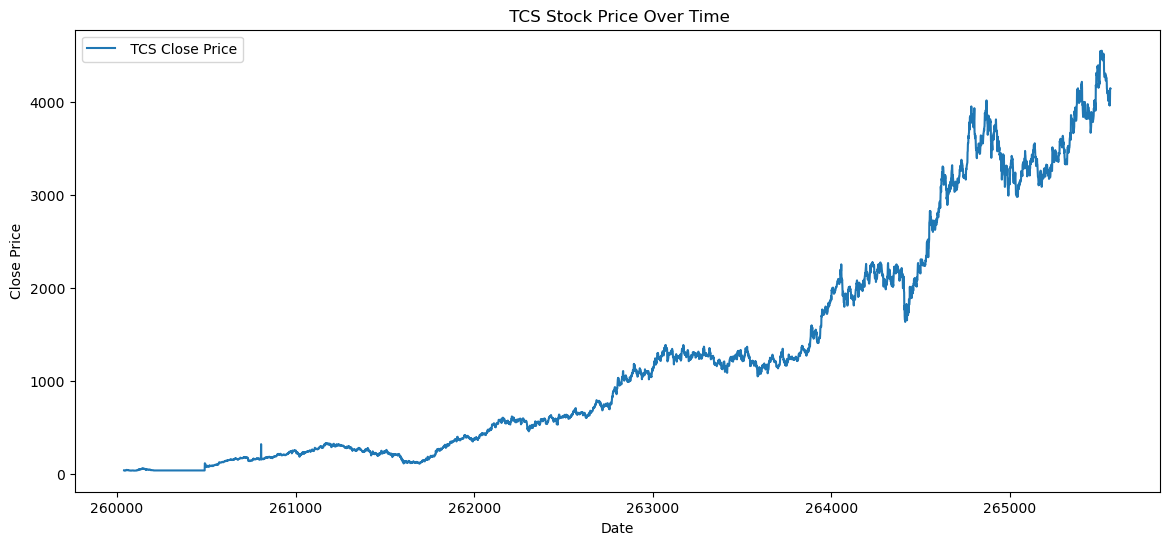

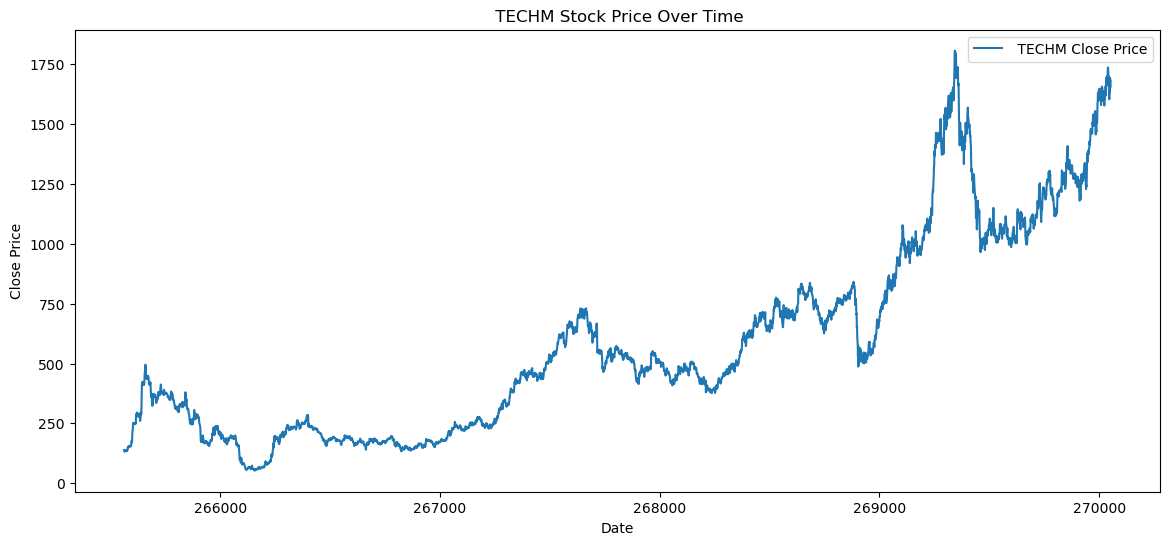

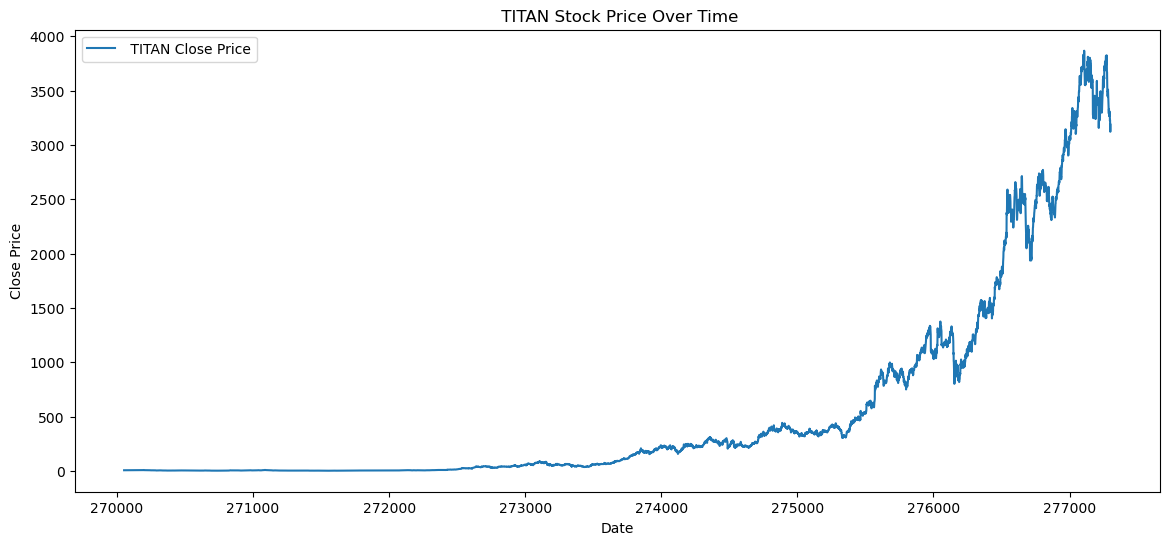

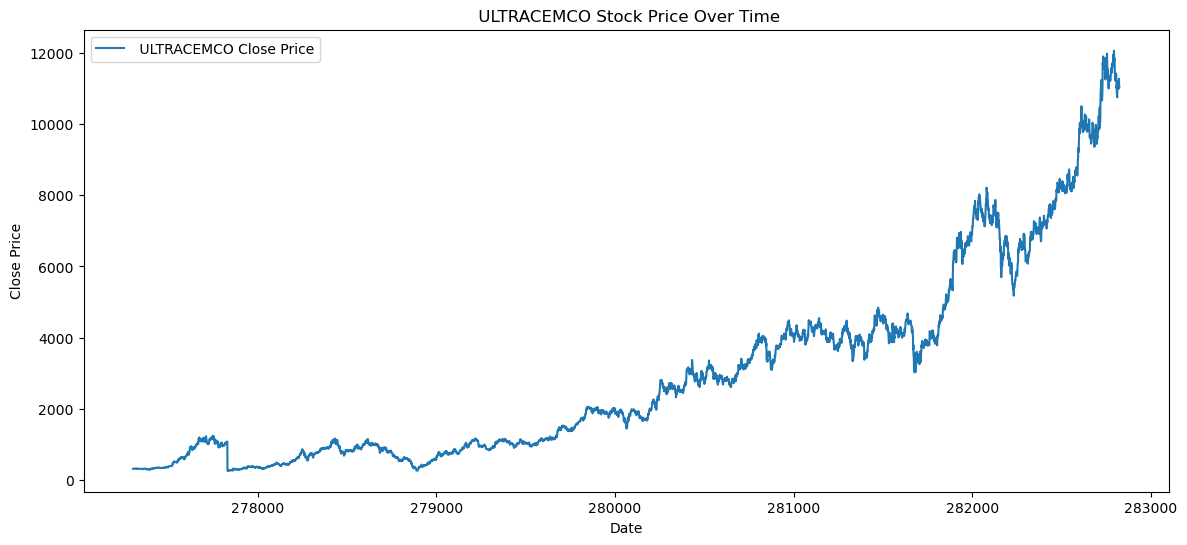

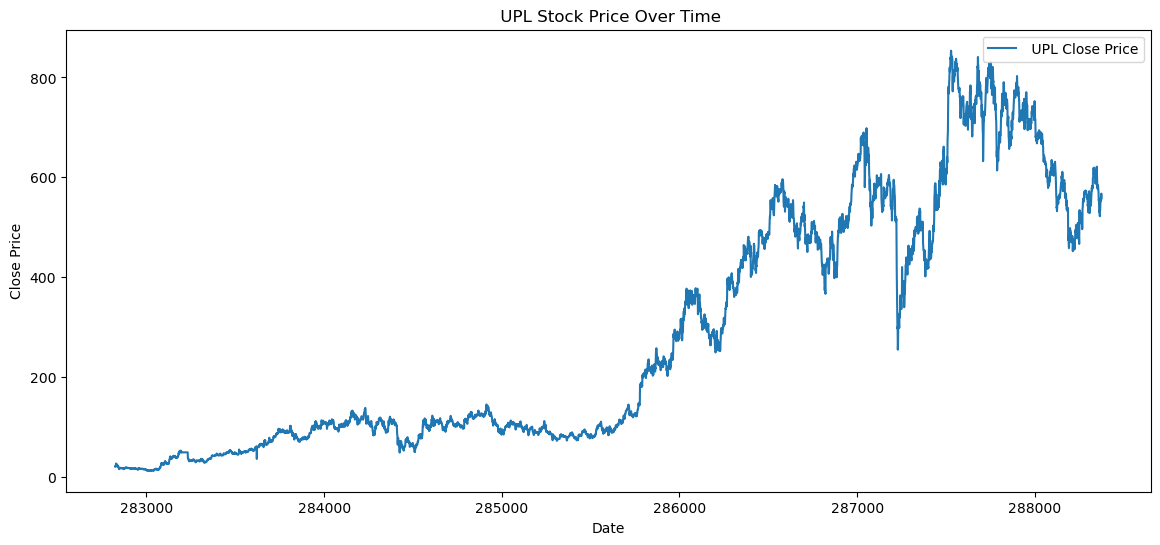

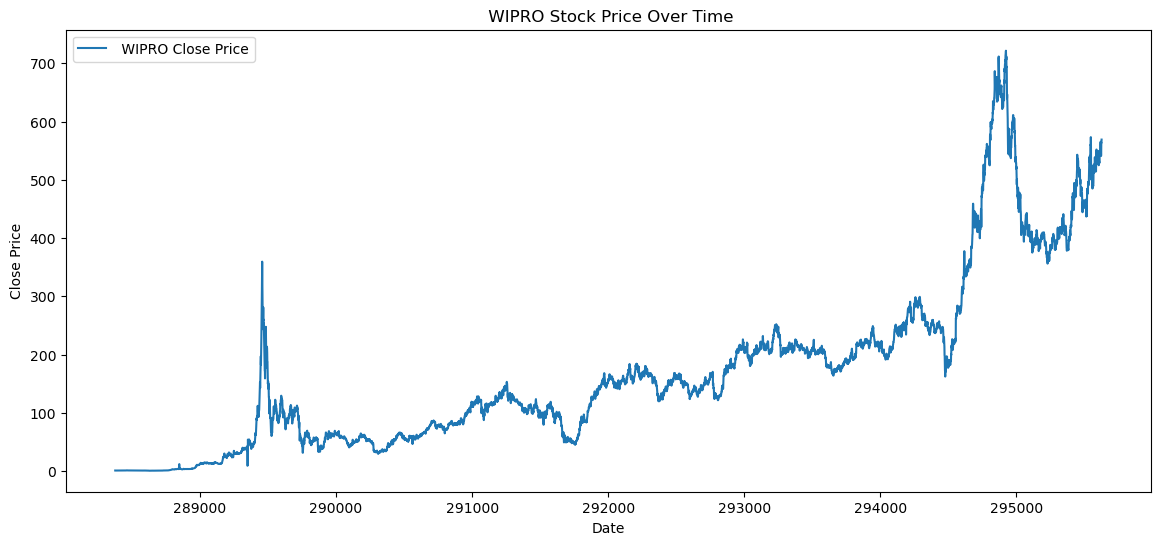

In [14]:
stock_list = df['Stock'].unique()
for stock in stock_list:
    stock_data = df[df['Stock'] == stock]
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data['Close'], label=f'{stock} Close Price')
    plt.title(f'{stock} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


In [15]:
df['Daily Return'] = df.groupby('Stock')['Close'].pct_change()

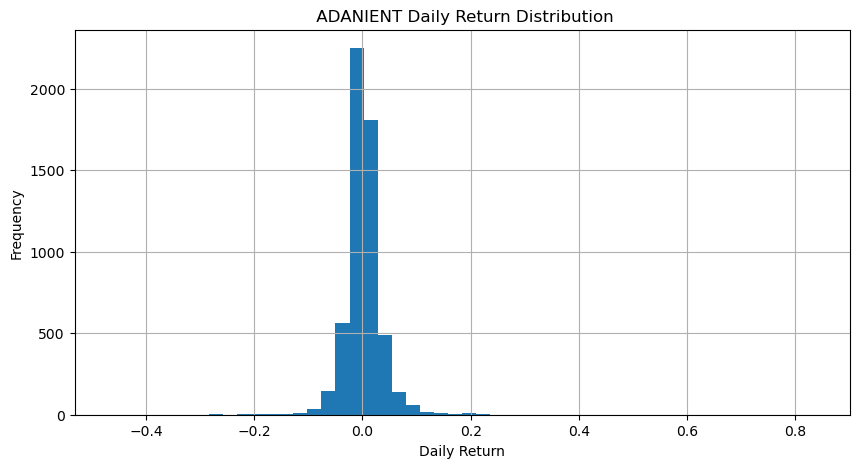

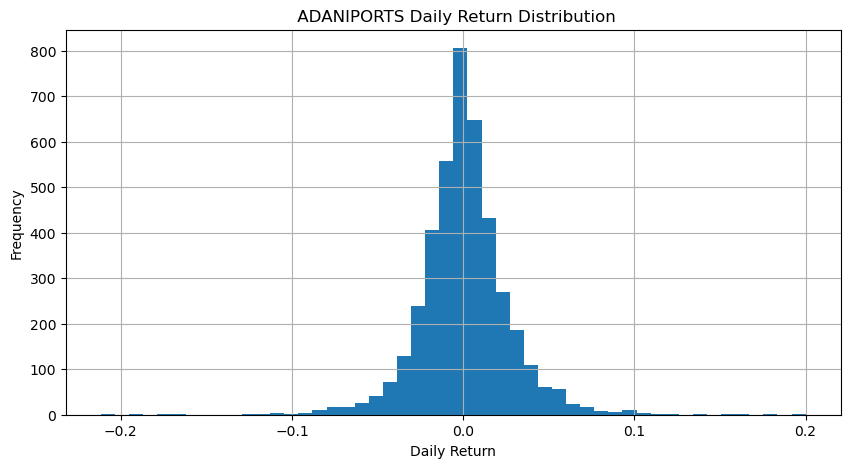

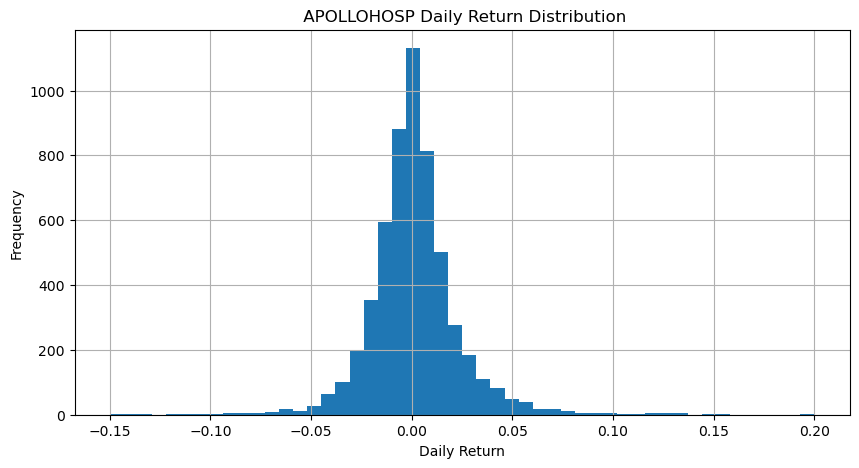

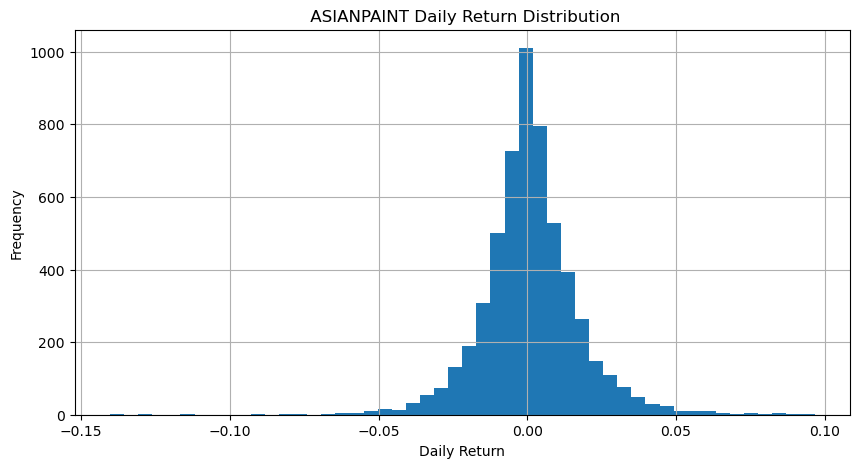

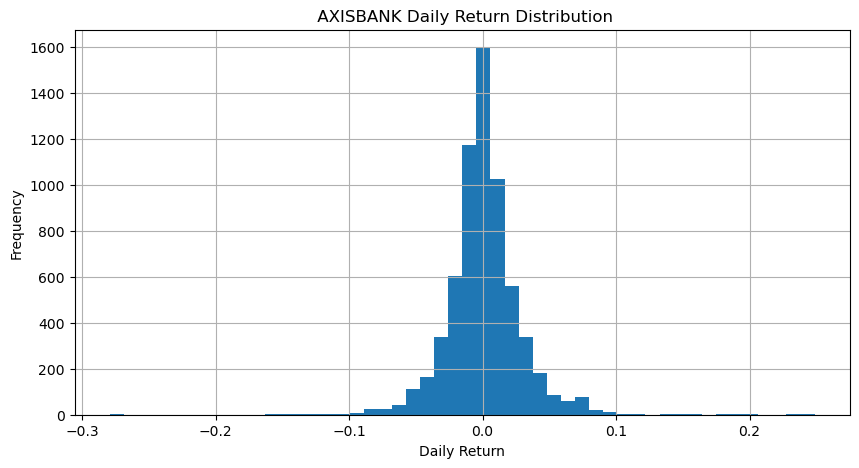

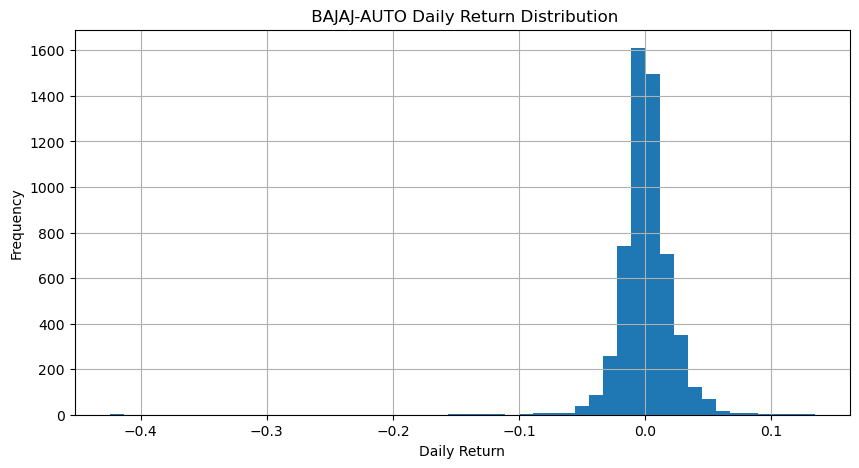

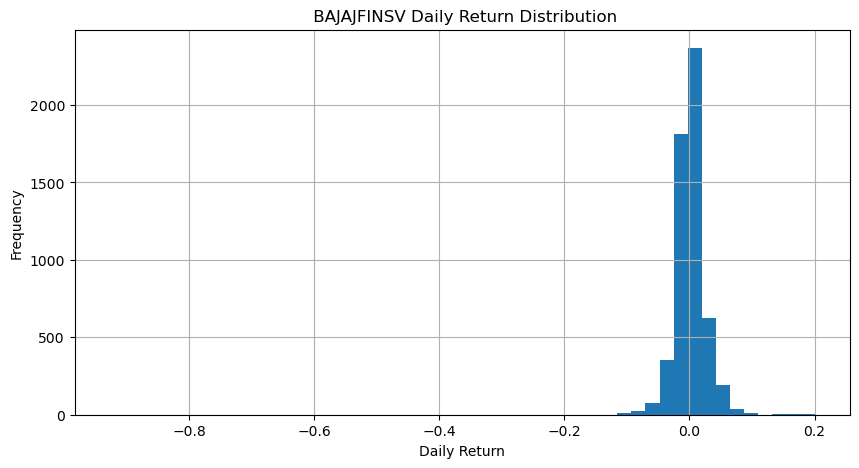

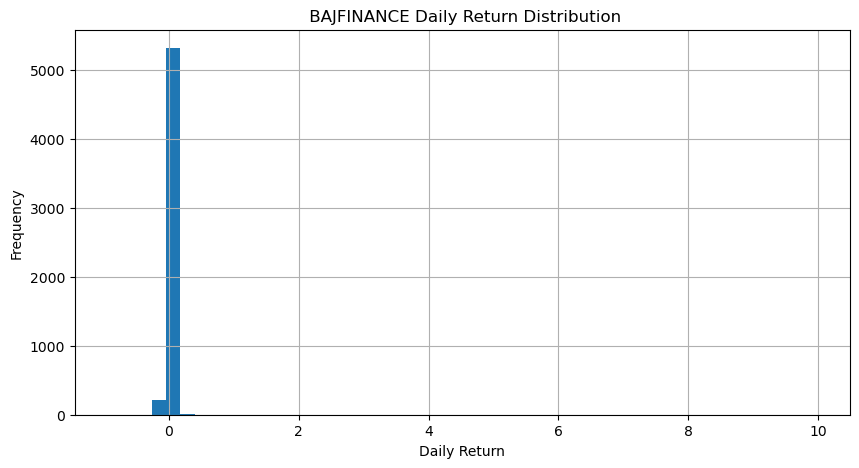

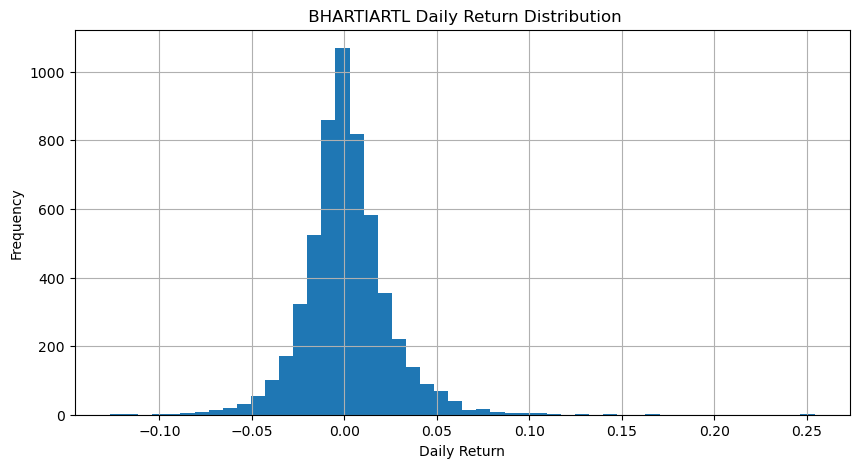

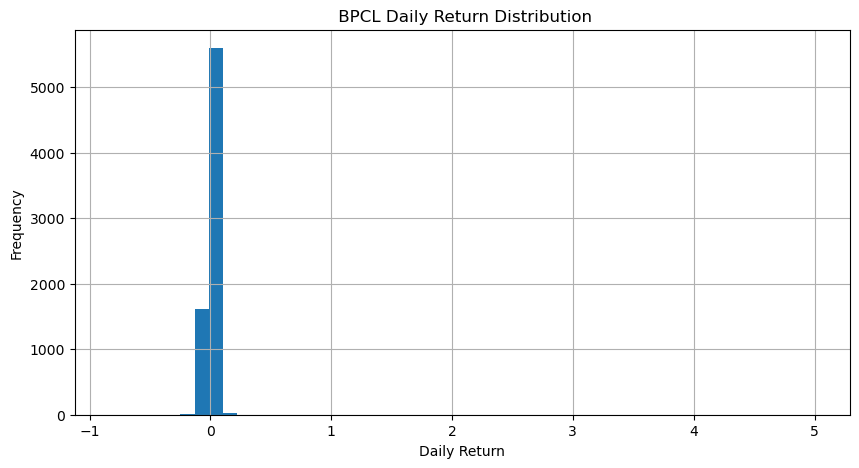

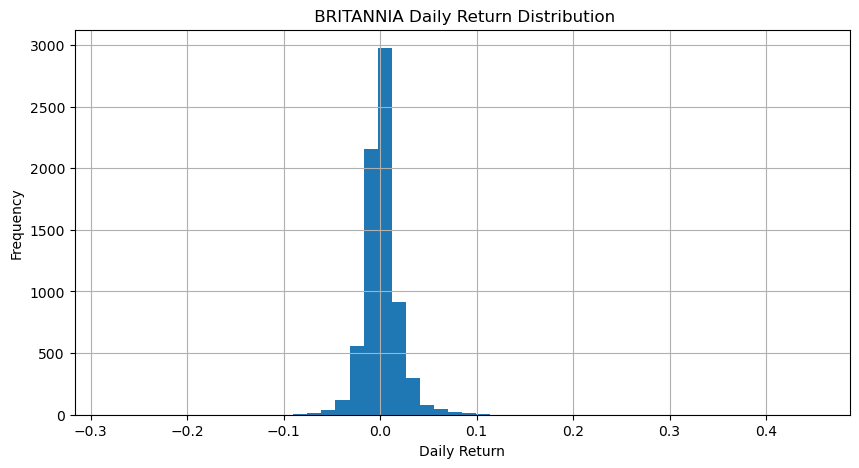

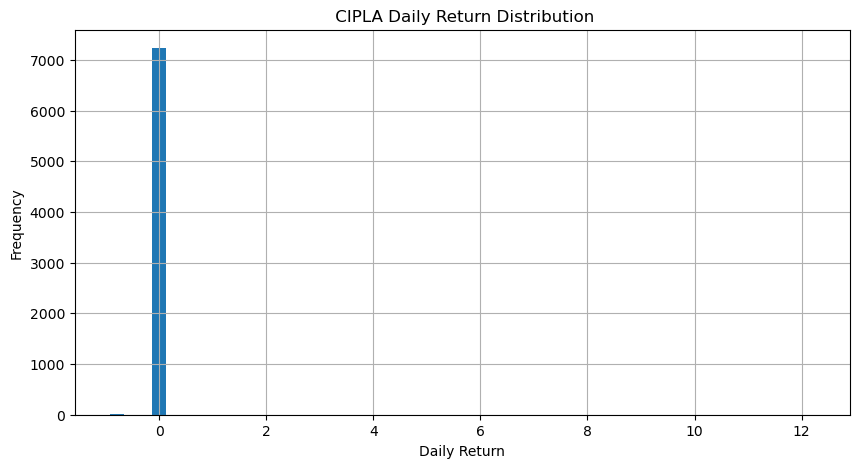

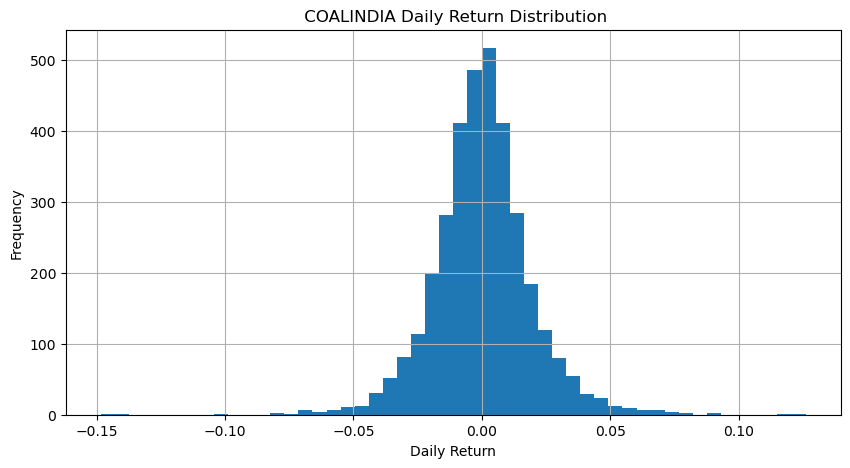

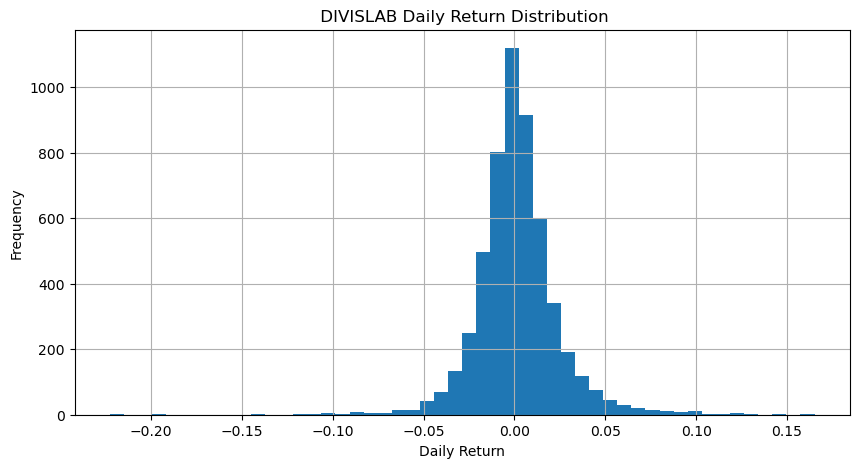

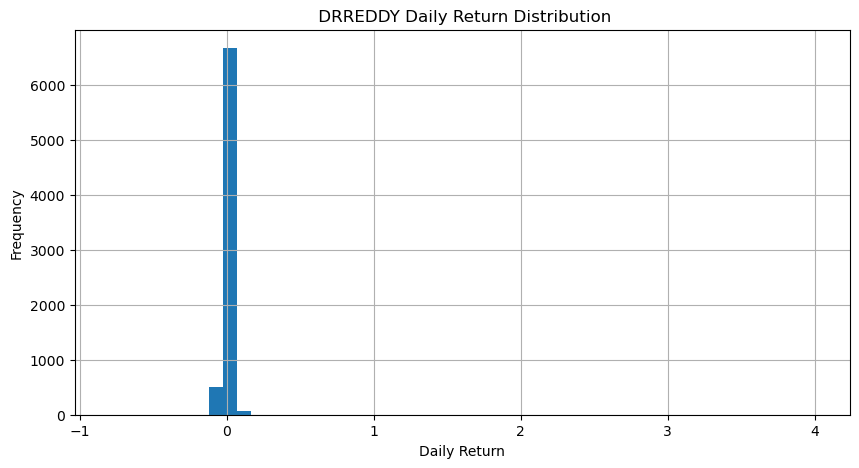

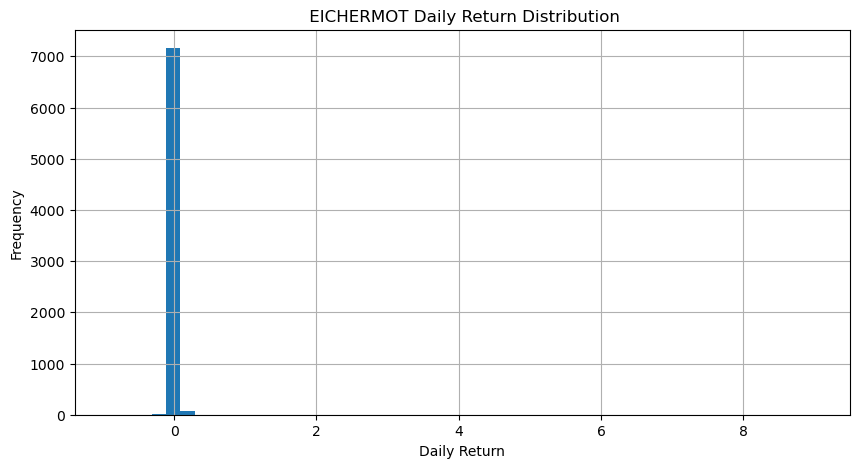

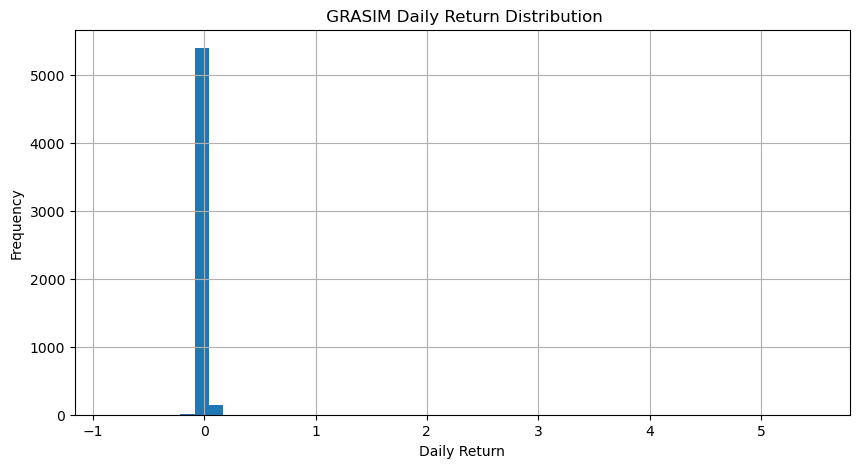

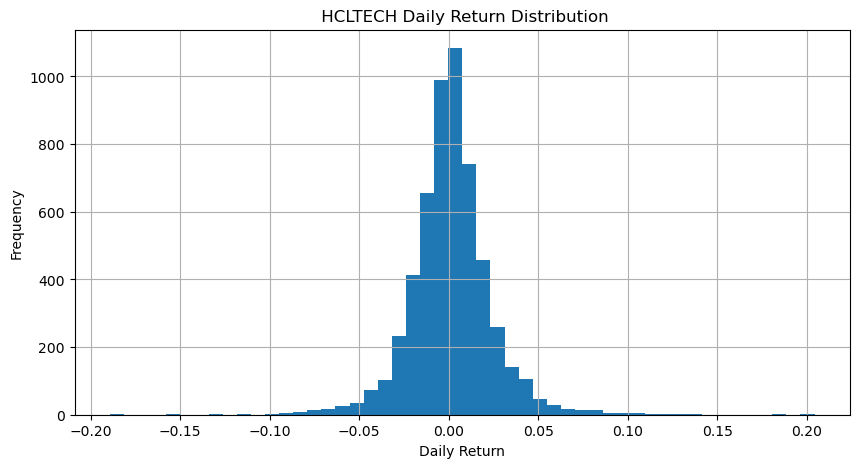

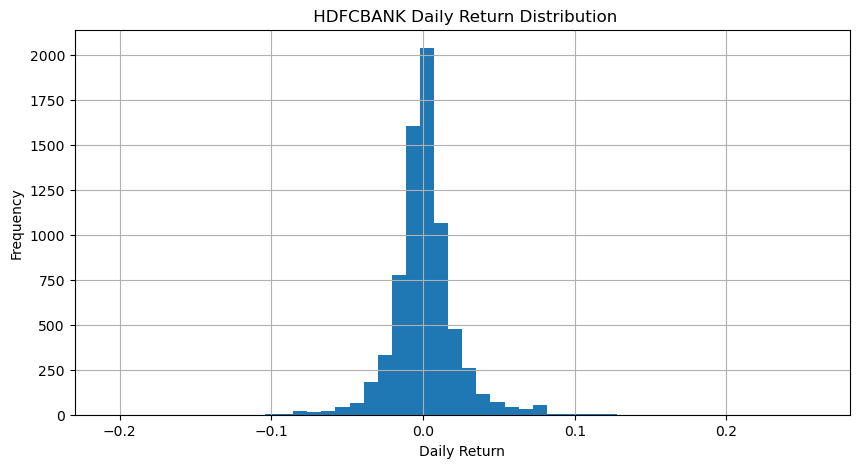

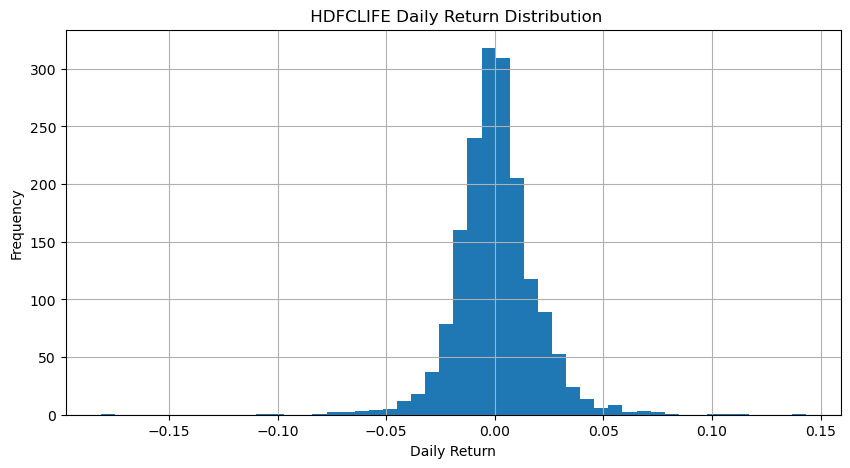

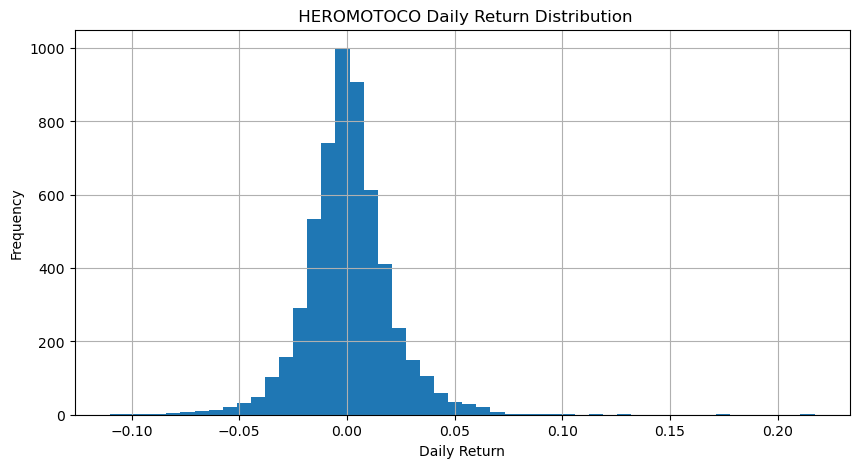

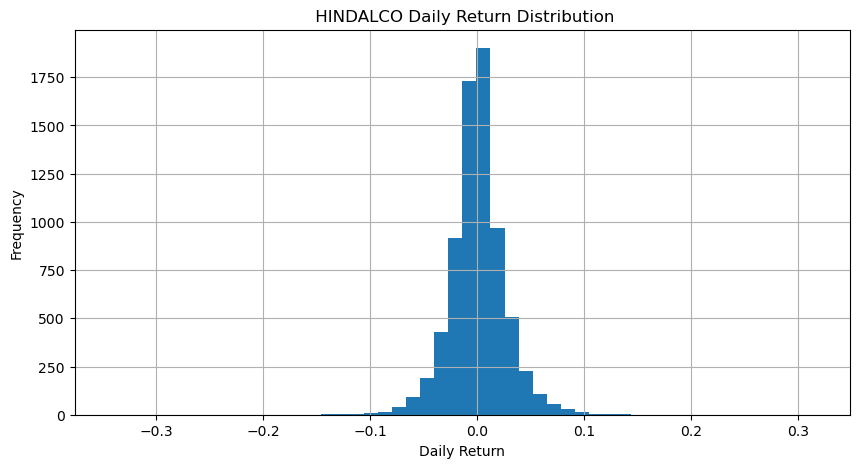

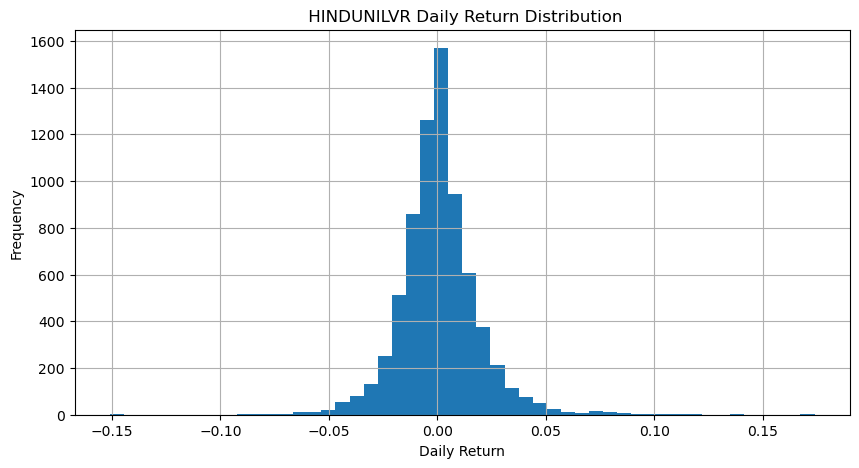

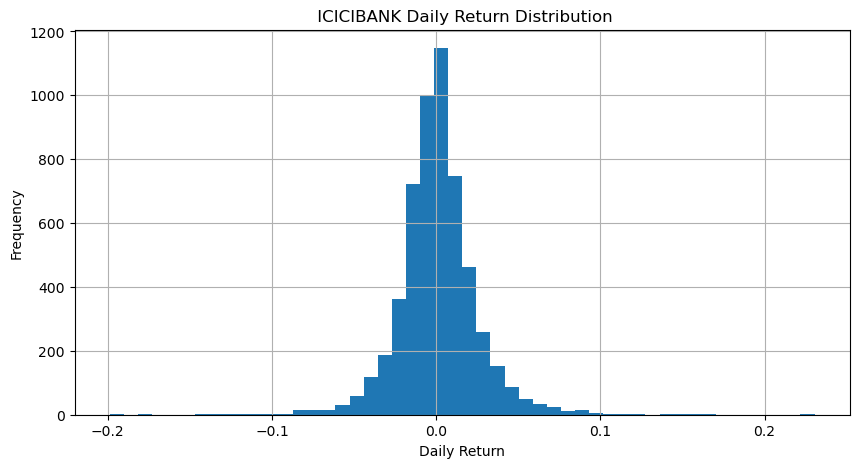

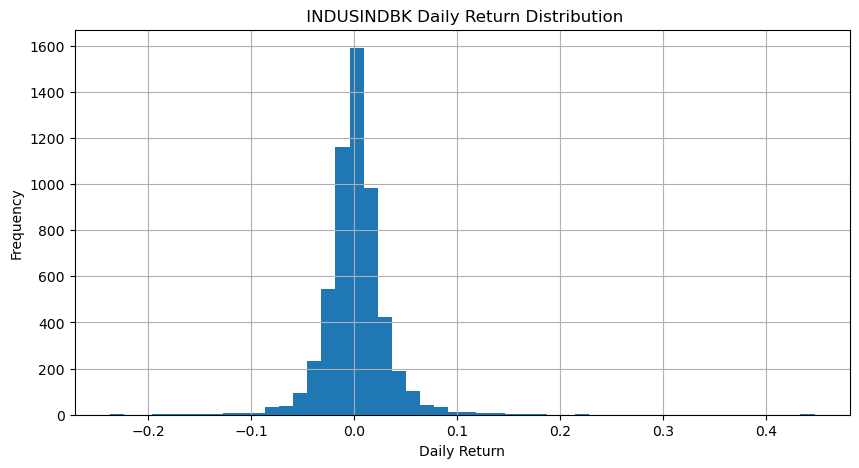

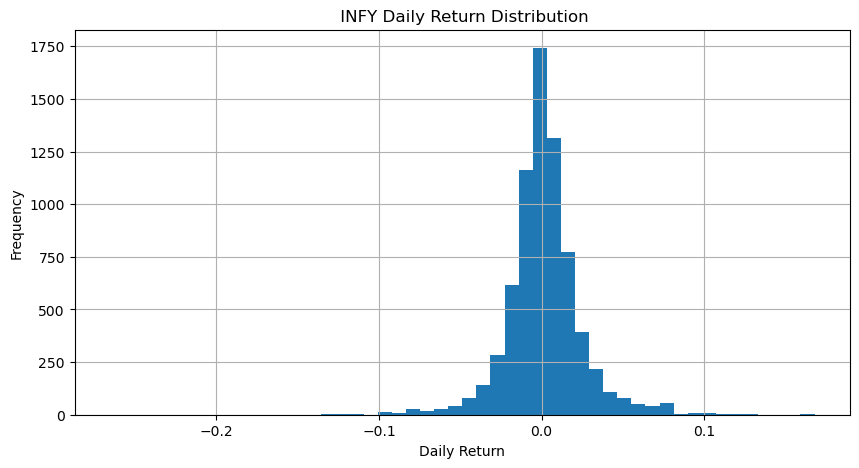

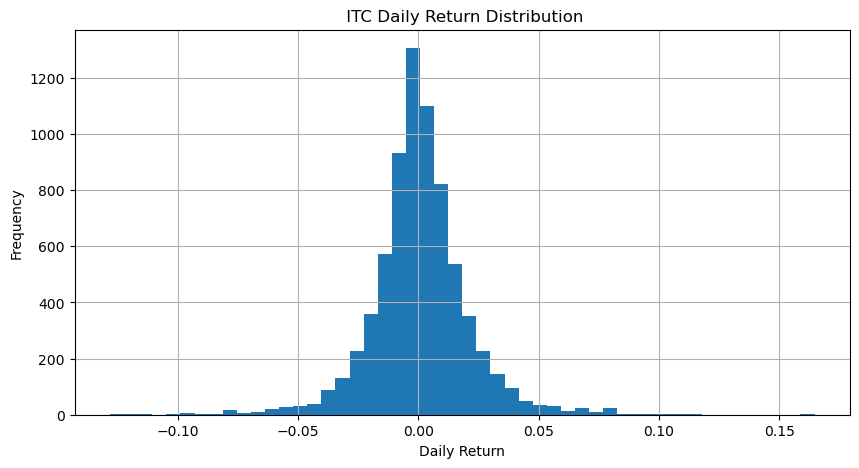

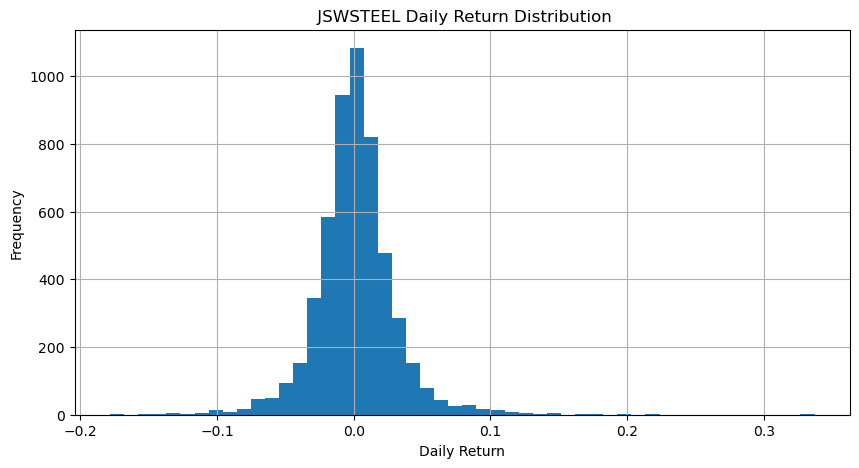

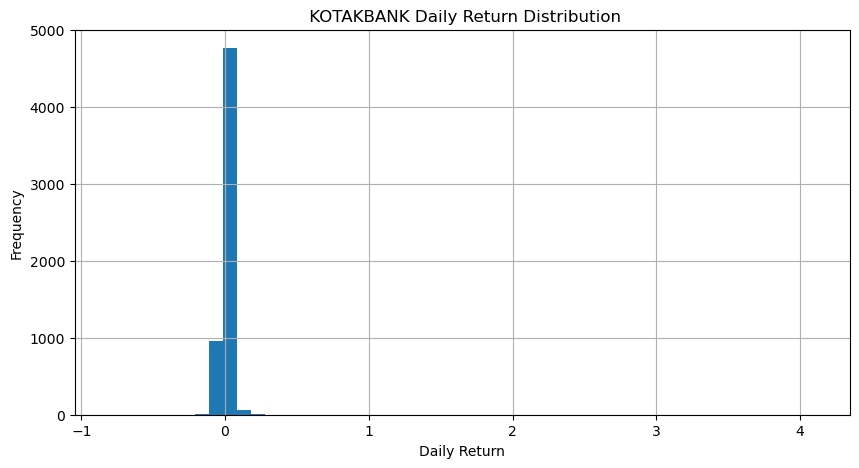

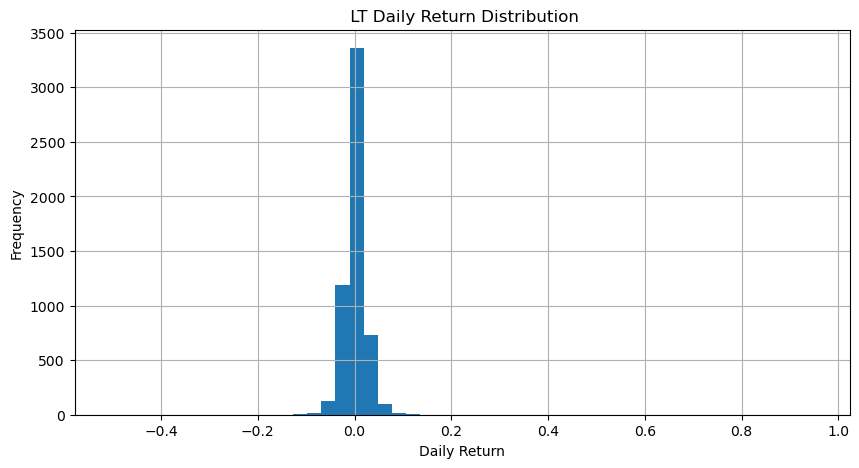

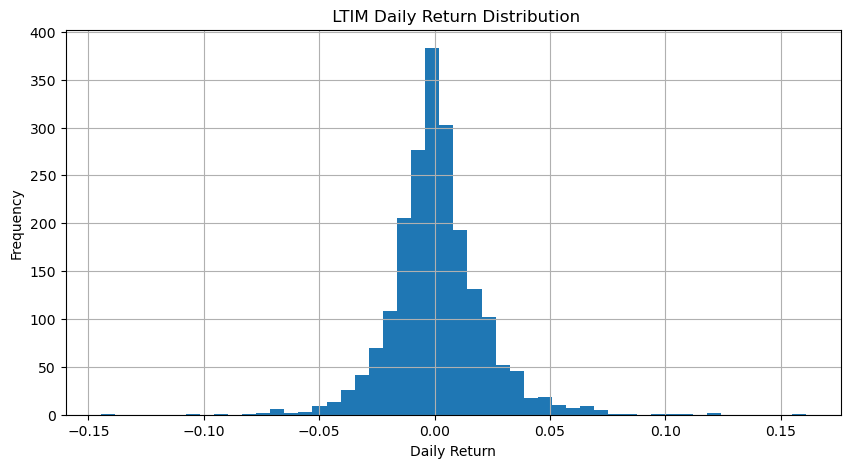

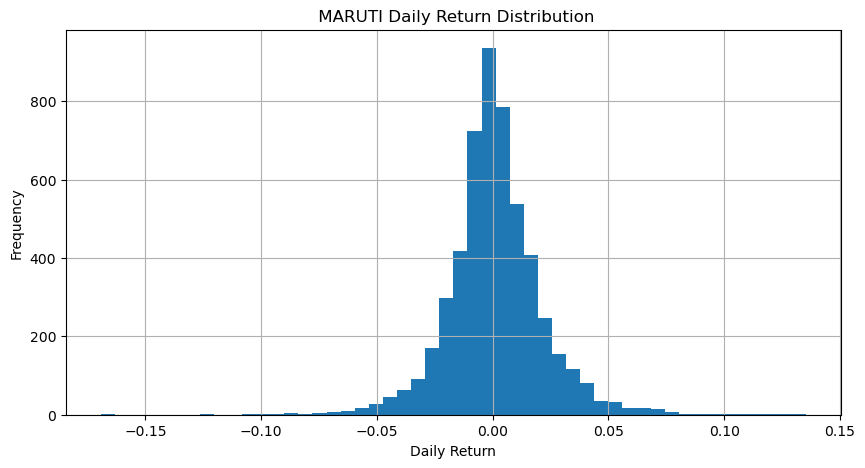

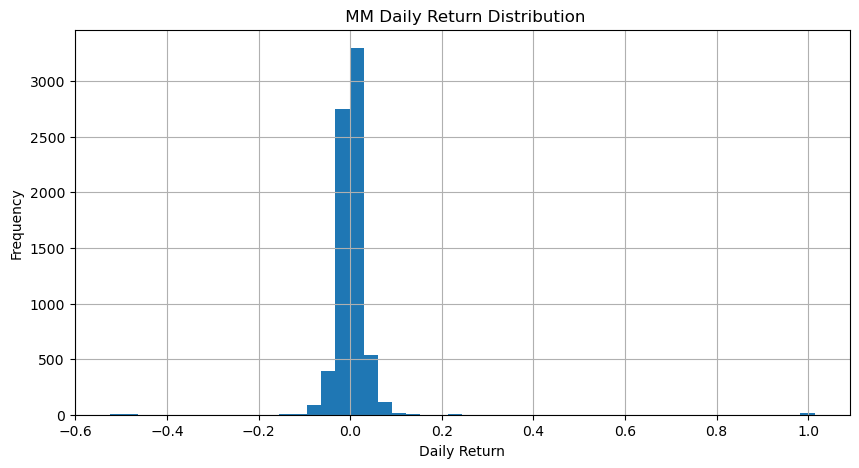

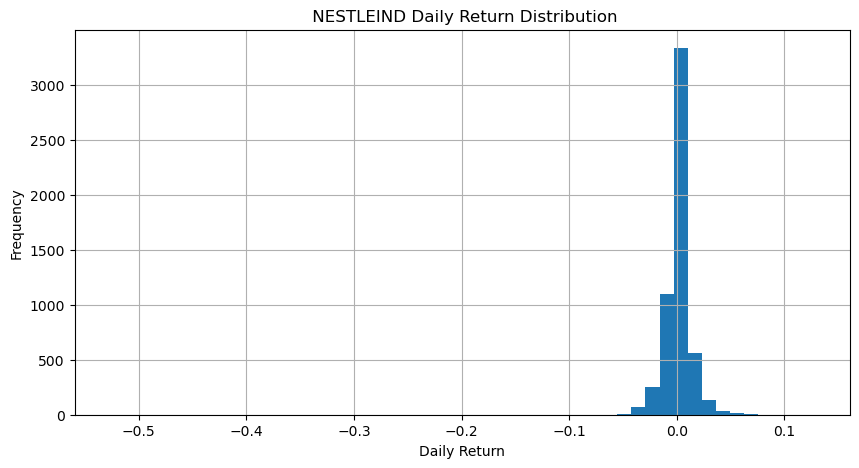

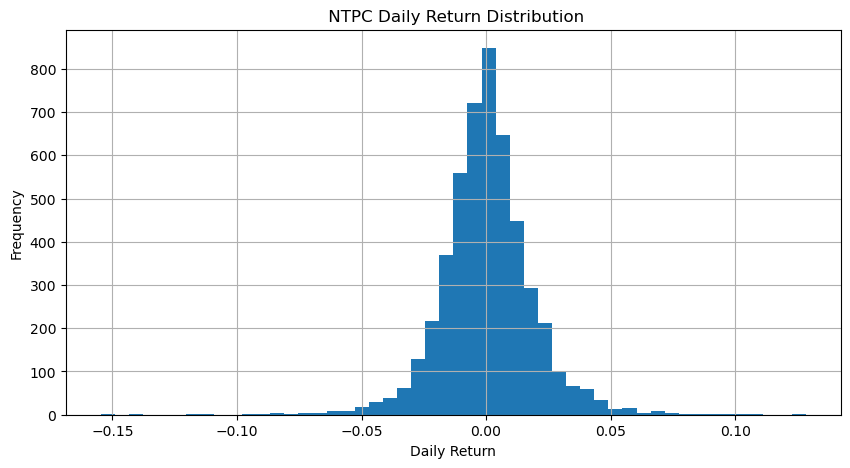

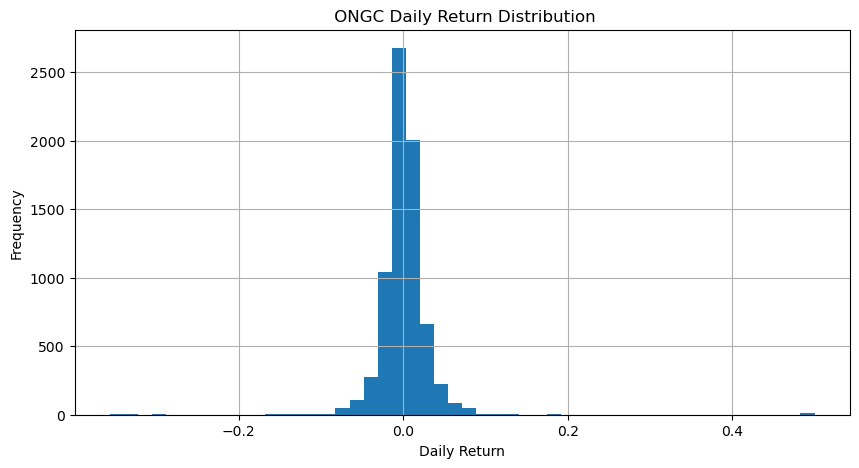

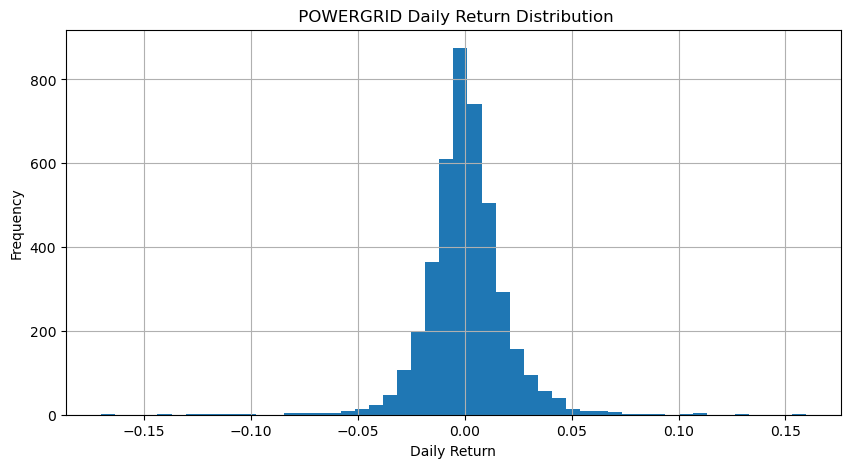

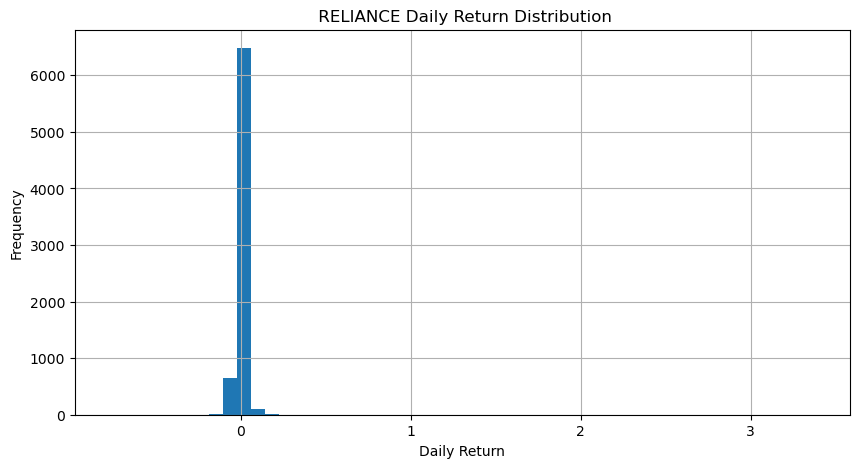

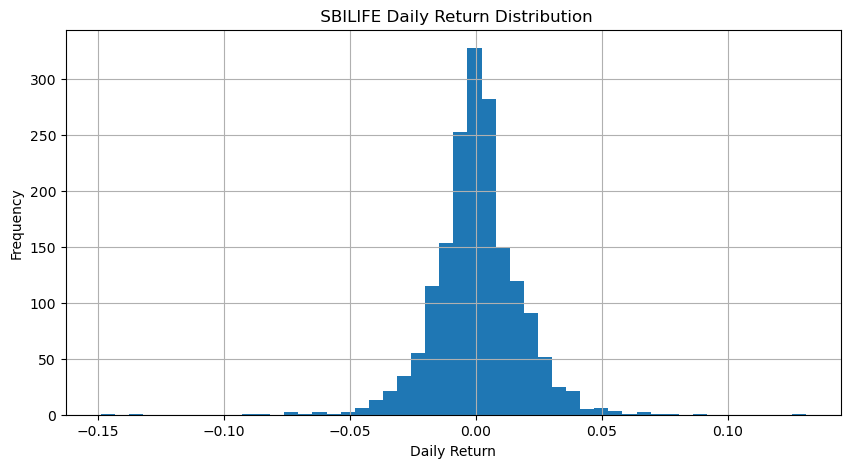

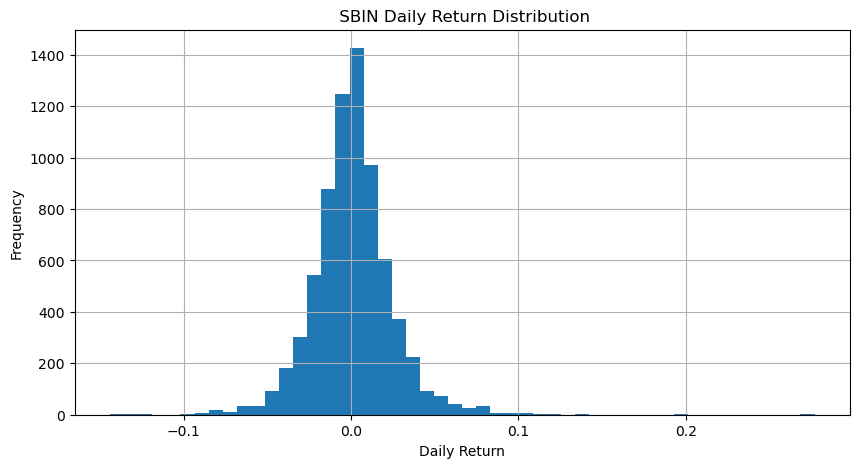

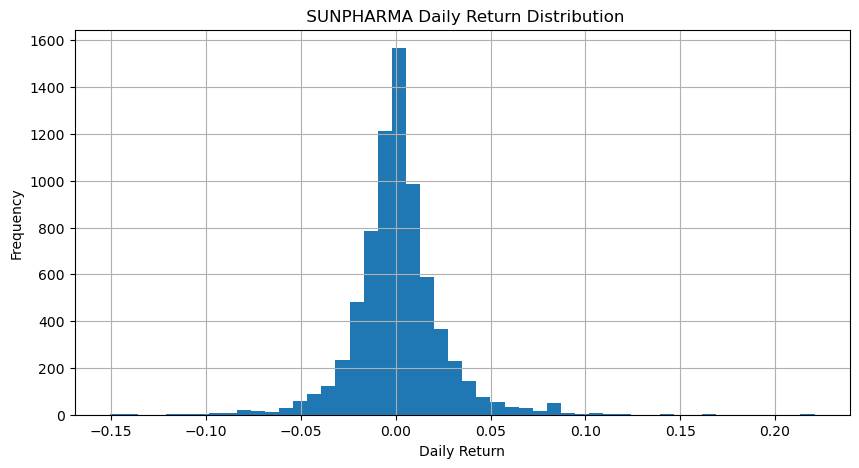

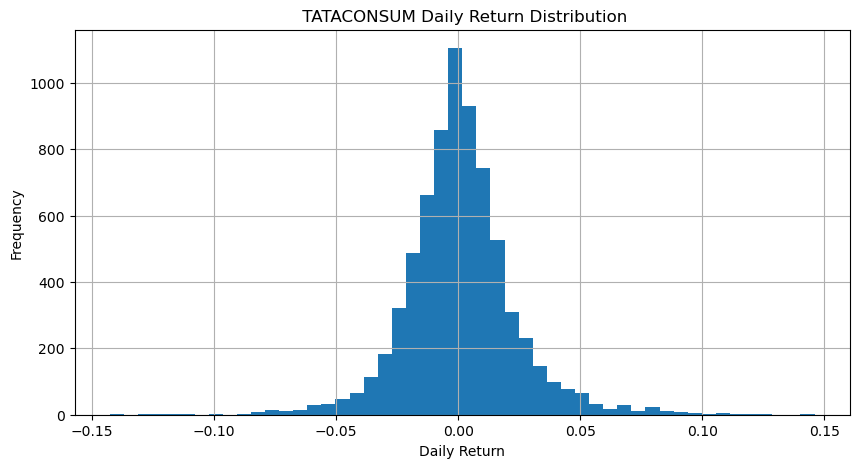

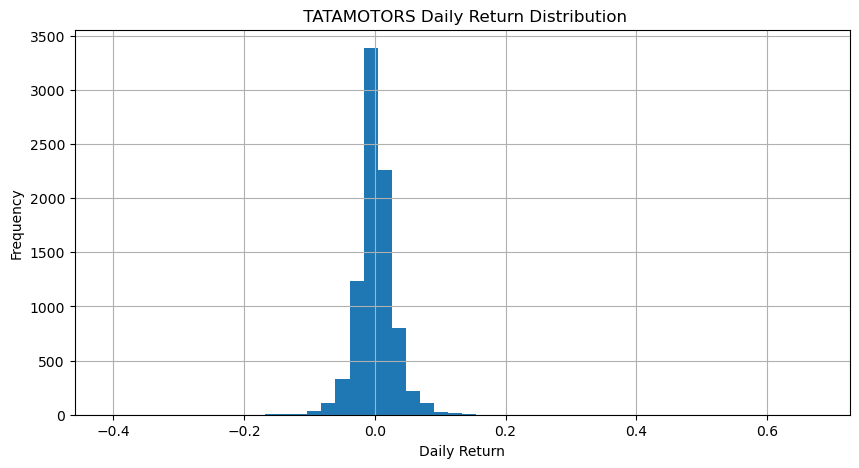

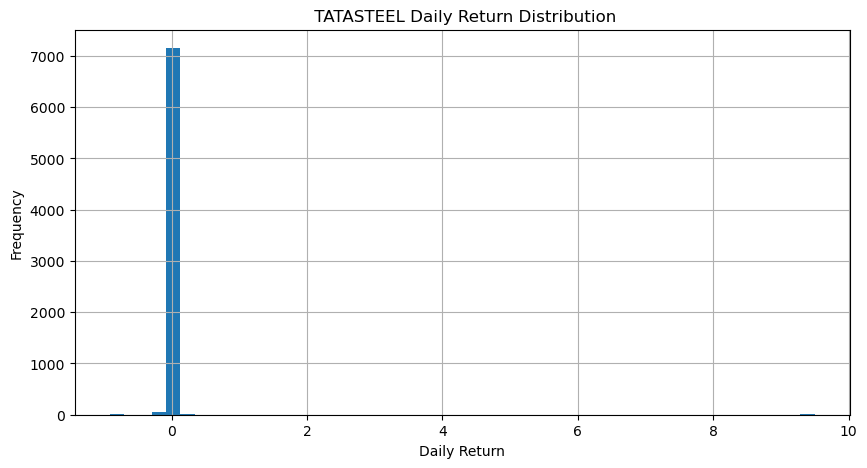

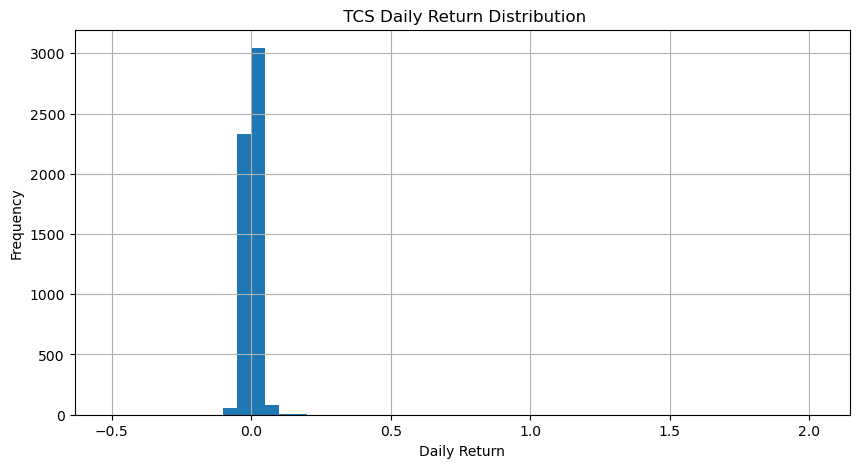

In [ ]:
for stock in stock_list:
    stock_data = df[df['Stock'] == stock]
    plt.figure(figsize=(10, 5))
    stock_data['Daily Return'].hist(bins=50)
    plt.title(f'{stock} Daily Return Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()
